<h1 style="font-size:40px;">Proyecto final</h1>

<h1 style="font-size:20px;">Descripción del proyecto:</h1> 


Este proyecto de análisis de datos se centra en el servicio de telefonía virtual CallMeMaybe, una plataforma utilizada por organizaciones para gestionar llamadas entrantes, salientes e internas a través de operadores humanos. El objetivo principal del estudio es identificar a los operadores ineficaces mediante un análisis cuantitativo de su desempeño, basado en métricas clave obtenidas de registros reales de llamadas.

El proyecto se desarrollará en tres etapas fundamentales:

Análisis exploratorio de datos (EDA): Se explorararán y limpiarán los datos del sistema de llamadas, permitiendo entender patrones de uso, distribución de llamadas y comportamiento general de los operadores.

Evaluación de hipótesis: Se defininirán y analizarán tres hipótesis relacionadas con indicadores de ineficacia operativa —porcentaje de llamadas perdidas, tiempo de espera en llamadas entrantes y número de llamadas salientes por día— y se realizaron pruebas estadísticas (pruebas A/B) para validar su relevancia.

Segmentación y visualización: Se identificarán grupos de operadores eficaces e ineficaces, se analizaron diferencias significativas entre ellos y se generaron visualizaciones que sustentan los hallazgos.

Este análisis permite a CallMeMaybe detectar ineficiencias específicas a nivel de operador, generar políticas de mejora basadas en evidencia y establecer criterios claros para la toma de decisiones estratégicas, operativas y de recursos humanos.

<h1 style="font-size:25px;">Link de Google drive: (con presentación,link de Dashboard en Tableau y documentación consultada)</h1>  


 https://drive.google.com/drive/folders/1ErlSqS7Cdox0SURri4sAueOySg7vPZqv?usp=sharing


<h1 style="font-size:30px;">Exploración de datos:</h1> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

<h1 style="font-size:20px;">Dataset 1</h1> 

In [2]:
df_telecom = pd.read_csv('/datasets/telecom_dataset_us.csv')
print(df_telecom)

       user_id                       date direction internal  operator_id  \
0       166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1       166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2       166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3       166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4       166377  2019-08-05 00:00:00+03:00       out    False     880022.0   
...        ...                        ...       ...      ...          ...   
53897   168606  2019-11-10 00:00:00+03:00       out     True     957922.0   
53898   168606  2019-11-11 00:00:00+03:00       out     True     957922.0   
53899   168606  2019-11-15 00:00:00+03:00       out     True     957922.0   
53900   168606  2019-11-15 00:00:00+03:00       out     True     957922.0   
53901   168606  2019-11-19 00:00:00+03:00        in    False          NaN   

       is_missed_call  calls_count  call_duration  total_call_duration  
0 

In [3]:
print(df_telecom.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None


In [4]:
df_telecom['internal'] = df_telecom['internal'].astype(bool)
print(df_telecom.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53902 non-null  bool   
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(2), float64(1), int64(4), object(2)
memory usage: 3.0+ MB
None


In [5]:
df_telecom['date'] = pd.to_datetime(df_telecom['date'],format='%Y-%m-%d %H:%M:%S%z')
print(df_telecom.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  int64                                
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53902 non-null  bool                                 
 4   operator_id          45730 non-null  float64                              
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64                                
dtypes: bool

In [6]:
print(df_telecom.isnull().sum())

user_id                   0
date                      0
direction                 0
internal                  0
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64


In [7]:
df_telecom[df_telecom.isnull().any(axis=1)]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62
17,166377,2019-08-07 00:00:00+03:00,in,False,NaN,True,2,0,24
27,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
...,...,...,...,...,...,...,...,...,...
53876,168601,2019-11-27 00:00:00+03:00,in,False,NaN,True,2,0,39
53880,168601,2019-11-28 00:00:00+03:00,in,False,NaN,True,1,0,19
53889,168603,2019-11-28 00:00:00+03:00,in,False,NaN,True,1,0,30
53893,168606,2019-11-08 00:00:00+03:00,in,False,NaN,True,6,0,121


In [8]:
df_telecom.isnull().mean() * 100

user_id                 0.000000
date                    0.000000
direction               0.000000
internal                0.000000
operator_id            15.160847
is_missed_call          0.000000
calls_count             0.000000
call_duration           0.000000
total_call_duration     0.000000
dtype: float64

In [9]:
df_telecom['operator_id'] = df_telecom['operator_id'].fillna('Sin operador')

In [10]:
print(df_telecom.isnull().sum())

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64


In [11]:
print(df_telecom.duplicated().sum())

4900


In [12]:
df_duplicados = df_telecom[df_telecom.duplicated()]
print(df_duplicados.head(10))

     user_id                      date direction  internal   operator_id  \
8     166377 2019-08-05 00:00:00+03:00       out     False      880020.0   
28    166377 2019-08-12 00:00:00+03:00        in     False  Sin operador   
44    166377 2019-08-14 00:00:00+03:00       out     False      880026.0   
45    166377 2019-08-14 00:00:00+03:00        in     False  Sin operador   
51    166377 2019-08-15 00:00:00+03:00       out     False      880026.0   
62    166377 2019-08-19 00:00:00+03:00       out     False      880026.0   
78    166377 2019-08-22 00:00:00+03:00       out     False      880026.0   
86    166377 2019-08-23 00:00:00+03:00       out     False      880026.0   
87    166377 2019-08-23 00:00:00+03:00        in     False      880026.0   
100   166377 2019-08-27 00:00:00+03:00       out     False      880028.0   

     is_missed_call  calls_count  call_duration  total_call_duration  
8              True            8              0                   50  
28             True  

In [13]:
df_telecom[df_telecom.duplicated(subset=['user_id', 'date', 'direction', 'call_duration'], keep=False)]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
6,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
...,...,...,...,...,...,...,...,...,...
53893,168606,2019-11-08 00:00:00+03:00,in,False,Sin operador,True,6,0,121
53896,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,False,1,0,25
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190


<h1 style="font-size:20px;">Dataset 2</h1> 

In [14]:
df_clients = pd.read_csv('/datasets/telecom_clients_us.csv')
print(df_clients)

     user_id tariff_plan  date_start
0     166713           A  2019-08-15
1     166901           A  2019-08-23
2     168527           A  2019-10-29
3     167097           A  2019-09-01
4     168193           A  2019-10-16
..       ...         ...         ...
727   166554           B  2019-08-08
728   166911           B  2019-08-23
729   167012           B  2019-08-28
730   166867           B  2019-08-22
731   166565           B  2019-08-08

[732 rows x 3 columns]


In [15]:
print(df_clients.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None


In [16]:
df_clients['date_start'] = pd.to_datetime(df_clients['date_start'], format='%Y-%m-%d')
print(df_clients.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB
None


In [17]:
print(df_clients.isnull().sum())

user_id        0
tariff_plan    0
date_start     0
dtype: int64


In [18]:
print(df_clients.duplicated().sum())

0


Observaciones:

-Se cambiaron diferentes columnas de tipo de dato para no afectar el analisis como la columna "date" de tipo object a datetotime  la columna internal de object a booleano ya que contiene un tipo de dato "cierto y falso".

- se llenaron los valores nulos de la columna operator id con la leyenda " sin operador" ya que son llamadas entrantes perdidas que no cuentan con operador asignado, y que tambien es importante analizarlo para comparar sin tambien esto afecta la efctividad de la empresa y se necesitan hacer recomendaciones en las llamadas no contestadas.

- En el caso de los valores duplicados no fueron eliminados ya que al analisar las filas, coinden con diferente tipos de llamadas y no son duplicados exactos, al eliminarlos afectaria el analisis de los operadores.

-Los valores atipicos se tomarán cuenta en el analisis y seran eliminados durante el codigo en dado caso de ser necesario y no obtener promedios inflados o datos no reales.

<h1 style="font-size:30px;">Analisis exploratorio de datos:</h1> 

<h1 style="font-size:30px;">Operadores con mayor porcentaje de llamadas entrantes perdidas mayor al promedio son ineficaces (H1)</h1> 

<h1 style="font-size:20px;">Calcular: % de llamadas entrantes perdidas por operador:</h1> 

In [19]:
df_incoming = df_telecom[df_telecom['direction'] == 'in']


total_calls = df_incoming.groupby('operator_id')['calls_count'].sum()


missed_calls = df_incoming[df_incoming['is_missed_call'] == True].groupby('operator_id')['calls_count'].sum()


df_summary = pd.DataFrame({
    'total_calls': total_calls,
    'missed_calls': missed_calls
}).fillna(0)  


df_summary['missed_call_percentage'] = (df_summary['missed_calls'] / df_summary['total_calls']) * 100


df_summary.head()


,total_calls,missed_calls,missed_call_percentage
operator_id,,,
879896.0,60,0.0,0.0
879898.0,118,0.0,0.0
880020.0,8,0.0,0.0
880022.0,8,0.0,0.0
880026.0,25,0.0,0.0


Text(0, 0.5, 'Número de operadores')

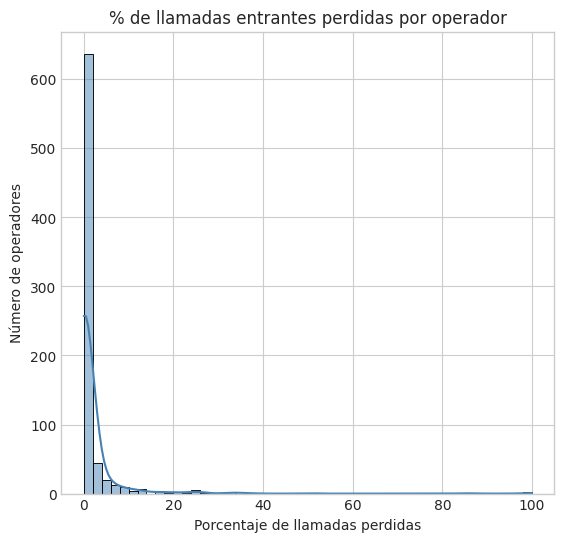

In [20]:
plt.style.use('seaborn-whitegrid')


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.histplot(df_summary['missed_call_percentage'], bins=50, color='steelblue', kde=True)
plt.title('% de llamadas entrantes perdidas por operador')
plt.xlabel('Porcentaje de llamadas perdidas')
plt.ylabel('Número de operadores')


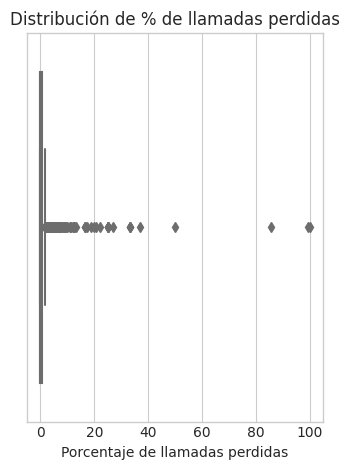

In [21]:
plt.subplot(1, 2, 2)
sns.boxplot(x=df_summary['missed_call_percentage'], color='salmon')
plt.title('Distribución de % de llamadas perdidas')
plt.xlabel('Porcentaje de llamadas perdidas')

plt.tight_layout()
plt.show()

<h1 style="font-size:20px;">Clasificación de operadores ineficaces según 30 % de llamadas perdidas:</h1>  

In [22]:
umbral = 30  


df_summary['ineficaz_llamadas'] = df_summary['missed_call_percentage'] > umbral


df_summary.sort_values('missed_call_percentage', ascending=False).head(10)

,total_calls,missed_calls,missed_call_percentage,ineficaz_llamadas
operator_id,,,,
948756.0,1,1.0,100.000000,True
Sin operador,113167,112453.0,99.369074,True
904344.0,7,6.0,85.714286,True
913886.0,2,1.0,50.000000,True
906392.0,19,7.0,36.842105,True
934098.0,6,2.0,33.333333,True
937432.0,3,1.0,33.333333,True
957922.0,3,1.0,33.333333,True
906412.0,26,7.0,26.923077,False


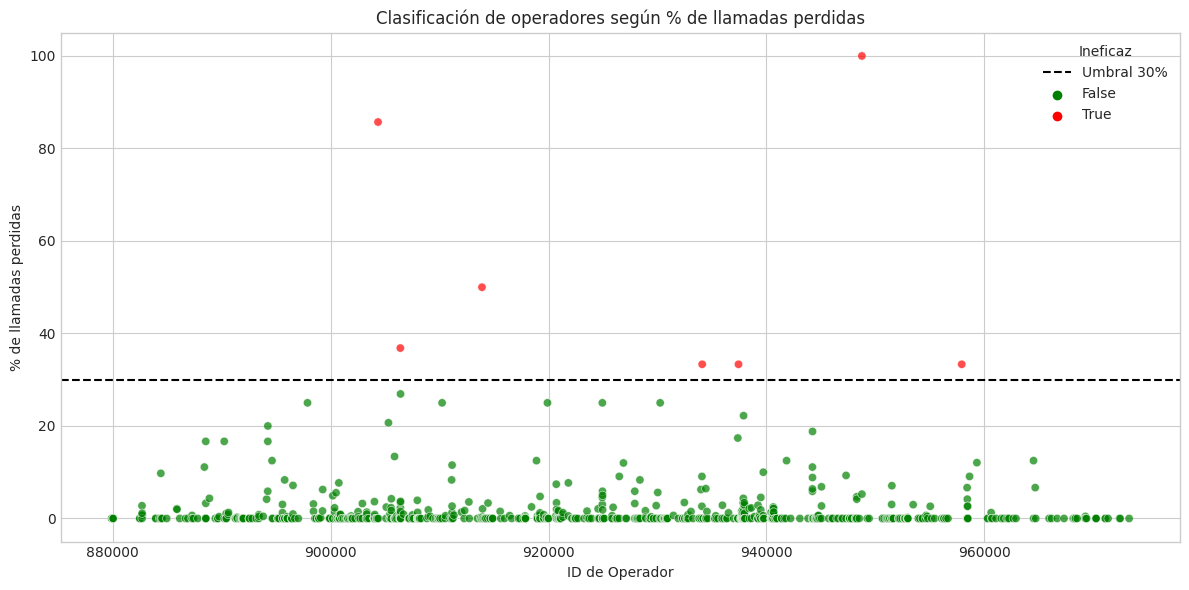

In [23]:
df_summary_plot = df_summary.reset_index()
df_summary_plot = df_summary_plot[df_summary_plot['operator_id'] != 'Sin operador']


df_summary_plot['operator_id'] = df_summary_plot['operator_id'].astype(float)


umbral = 30  


plt.figure(figsize=(12, 6))


sns.scatterplot(
    data=df_summary_plot,
    x='operator_id',
    y='missed_call_percentage',
    hue='ineficaz_llamadas',
    palette={True: 'red', False: 'green'},
    alpha=0.7
)


plt.axhline(y=umbral, color='black', linestyle='--', label=f'Umbral {umbral}%')


plt.title('Clasificación de operadores según % de llamadas perdidas')
plt.xlabel('ID de Operador')
plt.ylabel('% de llamadas perdidas')
plt.legend(title='Ineficaz', loc='upper right')

plt.tight_layout()
plt.show()

<h1 style="font-size:20px;">Comparar % de llamadas perdidas contra el percentil 75:</h1>


Umbral (percentil 75) de % de llamadas perdidas: 0.65%


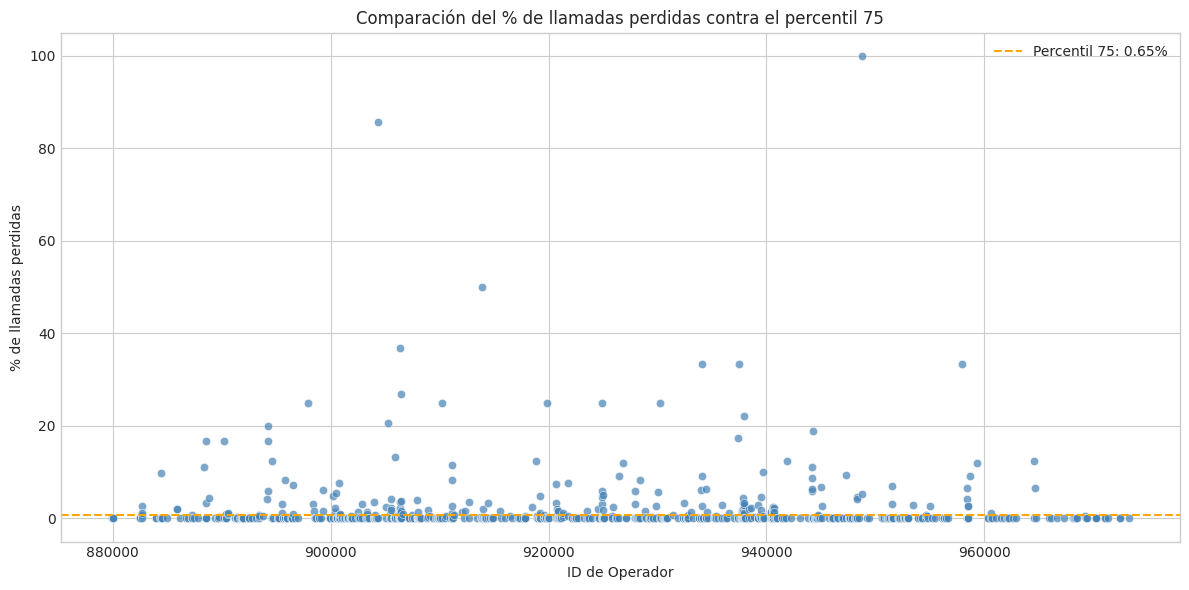

In [24]:
df_summary_plot = df_summary.reset_index()
df_summary_plot = df_summary_plot[df_summary_plot['operator_id'] != 'Sin operador']
df_summary_plot['operator_id'] = df_summary_plot['operator_id'].astype(float)


umbral_percentil_75 = np.percentile(df_summary_plot['missed_call_percentage'], 75)
print(f"Umbral (percentil 75) de % de llamadas perdidas: {umbral_percentil_75:.2f}%")


plt.figure(figsize=(12, 6))


sns.scatterplot(
    data=df_summary_plot,
    x='operator_id',
    y='missed_call_percentage',
    color='steelblue',
    alpha=0.7
)


plt.axhline(y=umbral_percentil_75, color='orange', linestyle='--', label=f'Percentil 75: {umbral_percentil_75:.2f}%')


plt.title('Comparación del % de llamadas perdidas contra el percentil 75')
plt.xlabel('ID de Operador')
plt.ylabel('% de llamadas perdidas')
plt.legend()

plt.tight_layout()
plt.show()


<h1 style="font-size:20px;"> Porcentaje de llamadas perdidas por operador</h1>

In [25]:
df_missed_calls = df_telecom[df_telecom['is_missed_call'] == True]


missed_calls_per_operator = df_missed_calls.groupby('operator_id')['calls_count'].sum().reset_index()


missed_calls_per_operator.rename(columns={'calls_count': 'total_missed_calls'}, inplace=True)


print(missed_calls_per_operator.head(20))

   operator_id  total_missed_calls
0     879896.0                 255
1     879898.0                2594
2     880020.0                  30
3     880022.0                 118
4     880026.0                 696
5     880028.0                1110
6     880240.0                  18
7     881278.0                  17
8     882478.0                   1
9     882680.0                   3
10    882684.0                 222
11    882686.0                1000
12    882688.0                  15
13    882690.0                 572
14    883018.0                   2
15    883940.0                 258
16    883942.0                 586
17    884402.0                   1
18    884406.0                   4
19    884408.0                  24


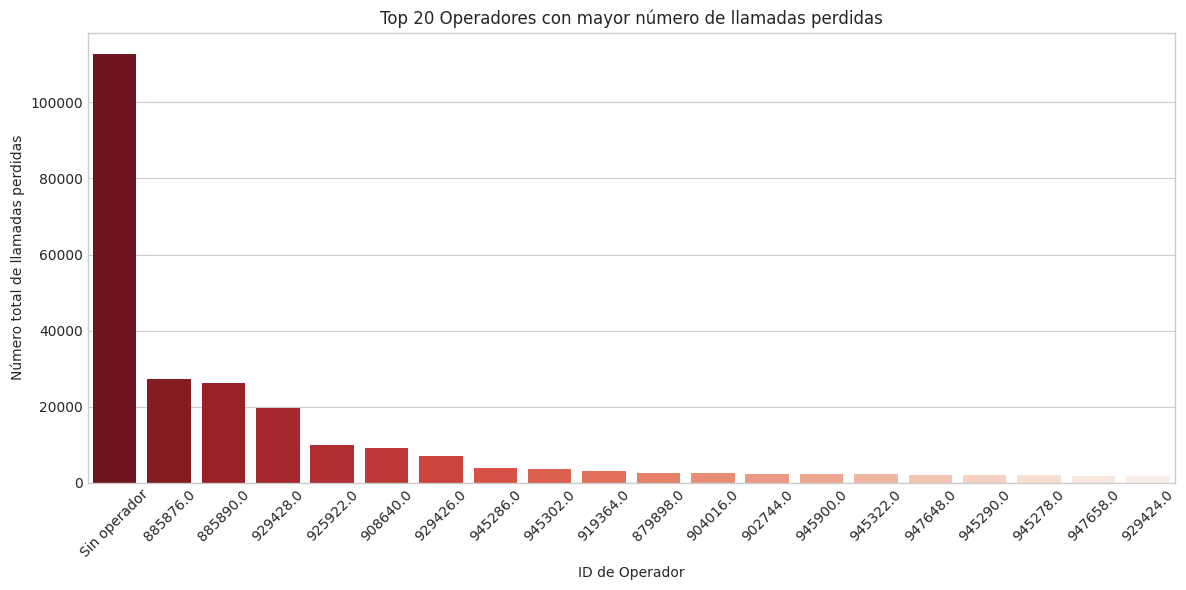

In [26]:
missed_calls_per_operator_sorted = missed_calls_per_operator.sort_values(by='total_missed_calls', ascending=False)


top_20 = missed_calls_per_operator_sorted.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_20,
    x='operator_id',
    y='total_missed_calls',
    palette='Reds_r'
)

plt.title('Top 20 Operadores con mayor número de llamadas perdidas')
plt.xlabel('ID de Operador')
plt.ylabel('Número total de llamadas perdidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1 style="font-size:20px;"> Etiquetar operadores con valores altos como posibles ineficaces</h1> 

In [27]:
umbral_percentil_75 = np.percentile(df_summary['missed_call_percentage'], 75)


df_summary['ineficaz_llamadas'] = df_summary['missed_call_percentage'] > umbral_percentil_75

df_summary[df_summary['ineficaz_llamadas'] == True].sort_values('missed_call_percentage', ascending=False).head(10)

,total_calls,missed_calls,missed_call_percentage,ineficaz_llamadas
operator_id,,,,
948756.0,1,1.0,100.000000,True
Sin operador,113167,112453.0,99.369074,True
904344.0,7,6.0,85.714286,True
913886.0,2,1.0,50.000000,True
906392.0,19,7.0,36.842105,True
934098.0,6,2.0,33.333333,True
957922.0,3,1.0,33.333333,True
937432.0,3,1.0,33.333333,True
906412.0,26,7.0,26.923077,True


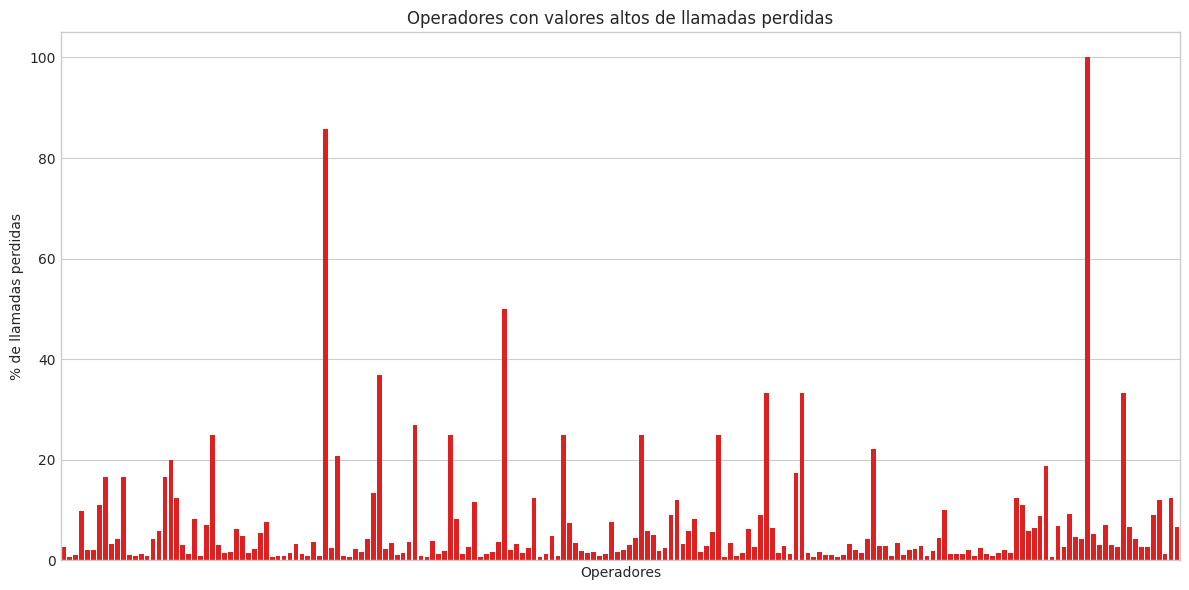

In [28]:
df_summary_plot = df_summary.reset_index()
df_summary_plot = df_summary_plot[df_summary_plot['operator_id'] != 'Sin operador']
df_summary_plot['operator_id'] = df_summary_plot['operator_id'].astype(float)


df_ineficaces = df_summary_plot[df_summary_plot['ineficaz_llamadas'] == True]


df_ineficaces = df_ineficaces.sort_values('missed_call_percentage', ascending=False)


plt.figure(figsize=(12, 6))


sns.barplot(
    data=df_ineficaces,
    x=df_ineficaces.index,  
    y='missed_call_percentage',
    color='red'
)


plt.title('Operadores con valores altos de llamadas perdidas')
plt.xlabel('Operadores')
plt.ylabel('% de llamadas perdidas')


plt.xticks([], [])

plt.tight_layout()
plt.show()

<h1 style="font-size:20px;">Operadores ineficaces segun porcentaje de llamadas</h1>

In [29]:
df_summary_plot = df_summary.reset_index()
df_summary_plot = df_summary_plot[df_summary_plot['operator_id'] != 'Sin operador']
df_summary_plot['operator_id'] = df_summary_plot['operator_id'].astype(float)


Q1 = df_summary_plot['missed_call_percentage'].quantile(0.25)
Q3 = df_summary_plot['missed_call_percentage'].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Límite inferior: {limite_inferior:.2f}%")
print(f"Límite superior: {limite_superior:.2f}%")


outliers = df_summary_plot[
    (df_summary_plot['missed_call_percentage'] < limite_inferior) |
    (df_summary_plot['missed_call_percentage'] > limite_superior)
]


print(f"Número de valores atípicos: {outliers.shape[0]}")
print(outliers[['operator_id', 'missed_call_percentage']].head(10))

Límite inferior: -0.98%
Límite superior: 1.63%
Número de valores atípicos: 127
    operator_id  missed_call_percentage
8      882680.0                2.752294
16     884408.0                9.756098
21     885876.0                2.083333
22     885890.0                1.980924
31     888406.0               11.111111
33     888532.0               16.666667
34     888534.0                3.278689
38     888868.0                4.347826
44     890228.0               16.666667
77     894120.0                4.166667


In [30]:
df_summary_plot = df_summary.reset_index()
df_summary_plot = df_summary_plot[df_summary_plot['operator_id'] != 'Sin operador']
df_summary_plot['operator_id'] = df_summary_plot['operator_id'].astype(float)


df_ineficaces = df_summary_plot[df_summary_plot['ineficaz_llamadas'] == True]


df_ineficaces_top = df_ineficaces.sort_values('missed_call_percentage', ascending=False).head(20)


print(df_ineficaces_top[['operator_id', 'missed_call_percentage']])

     operator_id  missed_call_percentage
641     948756.0              100.000000
185     904344.0               85.714286
287     913886.0               50.000000
210     906392.0               36.842105
497     937432.0               33.333333
467     934098.0               33.333333
698     957922.0               33.333333
220     906412.0               26.923077
431     930242.0               25.000000
338     919896.0               25.000000
265     910226.0               25.000000
383     924936.0               25.000000
109     897872.0               25.000000
525     937898.0               22.222222
189     905300.0               20.689655
80      894232.0               20.000000
598     944226.0               18.811881
494     937368.0               17.391304
79      894230.0               16.666667
44      890228.0               16.666667


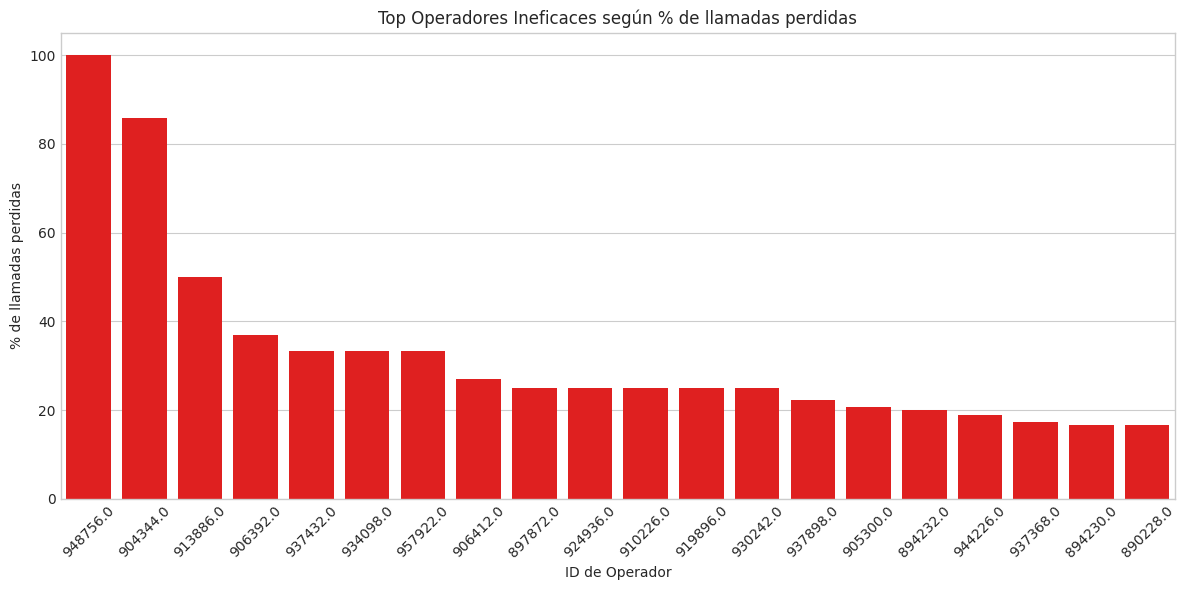

In [31]:
df_summary_plot = df_summary.reset_index()
df_summary_plot = df_summary_plot[df_summary_plot['operator_id'] != 'Sin operador']
df_summary_plot['operator_id'] = df_summary_plot['operator_id'].astype(float)


df_ineficaces = df_summary_plot[df_summary_plot['ineficaz_llamadas'] == True]


df_ineficaces_top = df_ineficaces.sort_values('missed_call_percentage', ascending=False).head(20)


df_ineficaces_top = df_ineficaces_top.sort_values('missed_call_percentage', ascending=False)


plt.figure(figsize=(12, 6))


sns.barplot(
    data=df_ineficaces_top,
    x='operator_id',
    y='missed_call_percentage',
    color='red',
    order=df_ineficaces_top['operator_id']  
)


plt.title('Top Operadores Ineficaces según % de llamadas perdidas')
plt.xlabel('ID de Operador')
plt.ylabel('% de llamadas perdidas')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

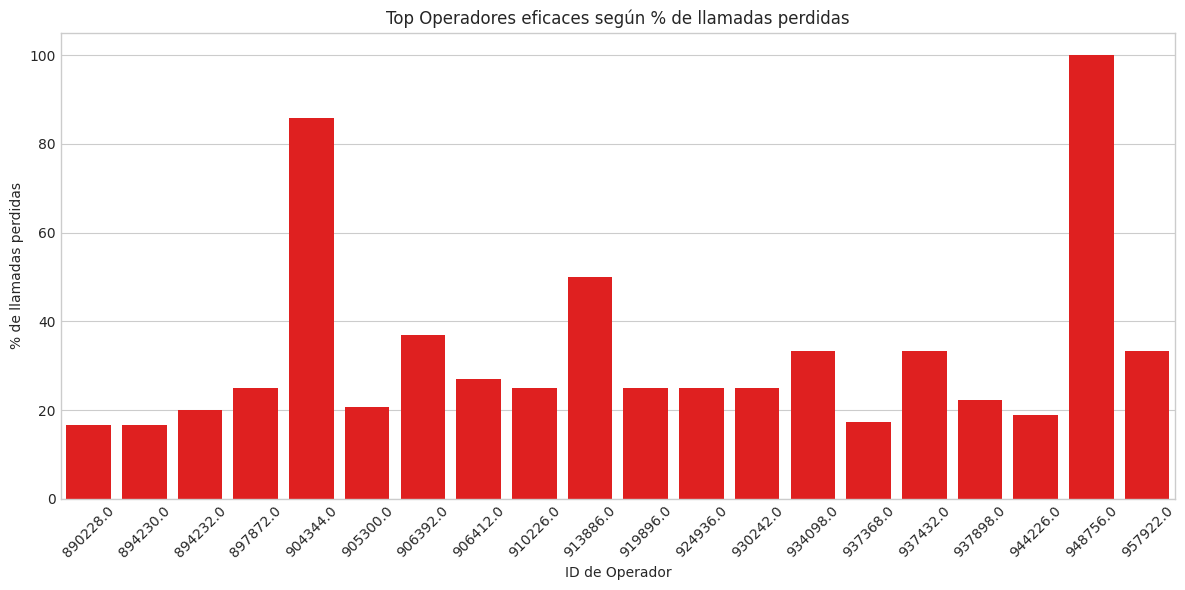

In [32]:
df_summary_plot = df_summary.reset_index()
df_summary_plot = df_summary_plot[df_summary_plot['operator_id'] != 'Sin operador']
df_summary_plot['operator_id'] = df_summary_plot['operator_id'].astype(float)


df_ineficaces = df_summary_plot[df_summary_plot['ineficaz_llamadas'] == True]


df_ineficaces_top = df_ineficaces.sort_values('missed_call_percentage', ascending=False).head(20)


plt.figure(figsize=(12, 6))


sns.barplot(
    data=df_ineficaces_top,
    x='operator_id',
    y='missed_call_percentage',
    color='red'
)


plt.title('Top Operadores eficaces según % de llamadas perdidas')
plt.xlabel('ID de Operador')
plt.ylabel('% de llamadas perdidas')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [33]:
Q1 = df_summary['missed_call_percentage'].quantile(0.25)
Q3 = df_summary['missed_call_percentage'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_no_outliers = df_summary[(df_summary['missed_call_percentage'] >= lower_bound) & (df_summary['missed_call_percentage'] <= upper_bound)]


promedio_missed_calls = df_no_outliers['missed_call_percentage'].mean()

print(f"Promedio general de llamadas perdidas (sin outliers): {promedio_missed_calls:.2f}%")

Promedio general de llamadas perdidas (sin outliers): 0.14%


In [34]:
missed_calls_sin_operador = df_telecom[
    (df_telecom['operator_id'] == 'Sin operador') & 
    (df_telecom['is_missed_call'] == True)
]


missed_calls_per_day = missed_calls_sin_operador.groupby('date')['calls_count'].sum().reset_index()


promedio_diario_missed_calls = missed_calls_per_day['calls_count'].mean()

print(f"Promedio diario de llamadas perdidas para 'Sin operador': {promedio_diario_missed_calls:.2f}")

Promedio diario de llamadas perdidas para 'Sin operador': 946.79


<h1 style="font-size:25px;">Observaciones</h1>


Existe una diferencia clara y muy grande en la eficacia de los operadores eficaces contra los no eficaces según el porcentaje de llamadas perdidas, teniendo un numero de llamadas perdidas teniendo tanto porcentajes muy bajos como muy altos y se puede notar que los operadores más eficaces tienen en promedio menos de 20 llamadas perdidas mientras que los operadores ineficientes un promedio de 25 a 40 lladadas perdidas.


El grupo ineficaz muestra una diferencia muy grande de pérdidas comparado con los eficacez , lo que puede impactar negativamente en la experiencia del cliente y la el servicio que se ofrece al usuario.



Se recomienda revisar los datos de operadores con más del  25 llamadas pérdidas e investigar causas específicas: sobrecarga, ausencias, o fallos en la distribución de llamadas.

El promedio diario de llamadas perdidas "sin operador" tambien es muy alto teniendo en promedio un total de 946 por dia, lo cual es mucho más elevado conparado con los operadores ieficientes en cuanto a llamadas perdidas y necesita ser atendido antes de evaluar a los operadores de entre 20 a 50 llamadas perdidas por dia por lo cual tambien es de los principales problemas que deben atenderse.




<h1 style="font-size:25px;">Operadores con un tiempo promedio de espera en llamadas entrantes mayor al promedio son ineficaces (H2)</h1> 

<h1 style="font-size:20px;">Calcular el tiempo de espera para llamadas entrantes</h1> 

In [35]:
df_incoming = df_telecom[df_telecom['direction'] == 'in'].copy()


df_incoming['waiting_time'] = df_incoming['total_call_duration'] - df_incoming['call_duration']


df_incoming[['operator_id', 'total_call_duration', 'call_duration', 'waiting_time']].head(10)

,operator_id,total_call_duration,call_duration,waiting_time
0,Sin operador,4,0,4
7,Sin operador,35,0,35
9,Sin operador,62,0,62
17,Sin operador,24,0,24
26,880028.0,411,407,4
27,Sin operador,34,0,34
28,Sin operador,34,0,34
30,Sin operador,128,0,128
34,880028.0,102,88,14
37,880026.0,218,197,21


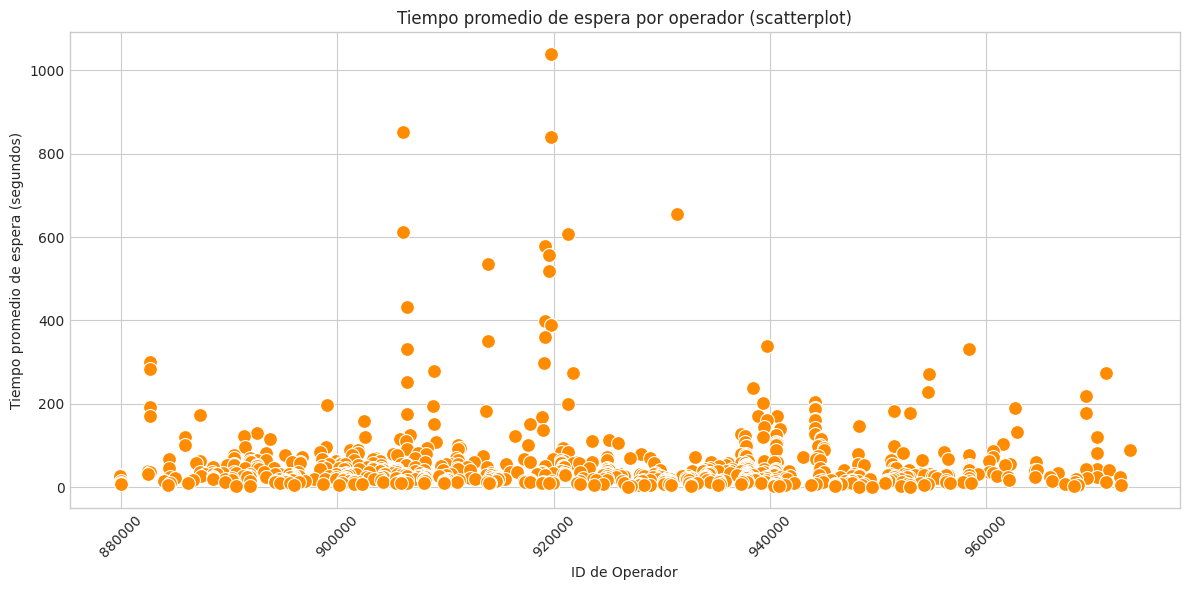

In [36]:
avg_waiting_time = df_incoming.groupby('operator_id')['waiting_time'].mean().reset_index()


avg_waiting_time = avg_waiting_time[avg_waiting_time['operator_id'] != 'Sin operador']


avg_waiting_time['operator_id'] = avg_waiting_time['operator_id'].astype(float)


avg_waiting_time = avg_waiting_time.sort_values('waiting_time', ascending=False)


plt.figure(figsize=(12,6))
sns.scatterplot(
    data=avg_waiting_time,
    x='operator_id',
    y='waiting_time',
    color='darkorange',
    s=100
)

plt.title('Tiempo promedio de espera por operador (scatterplot)')
plt.xlabel('ID de Operador')
plt.ylabel('Tiempo promedio de espera (segundos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


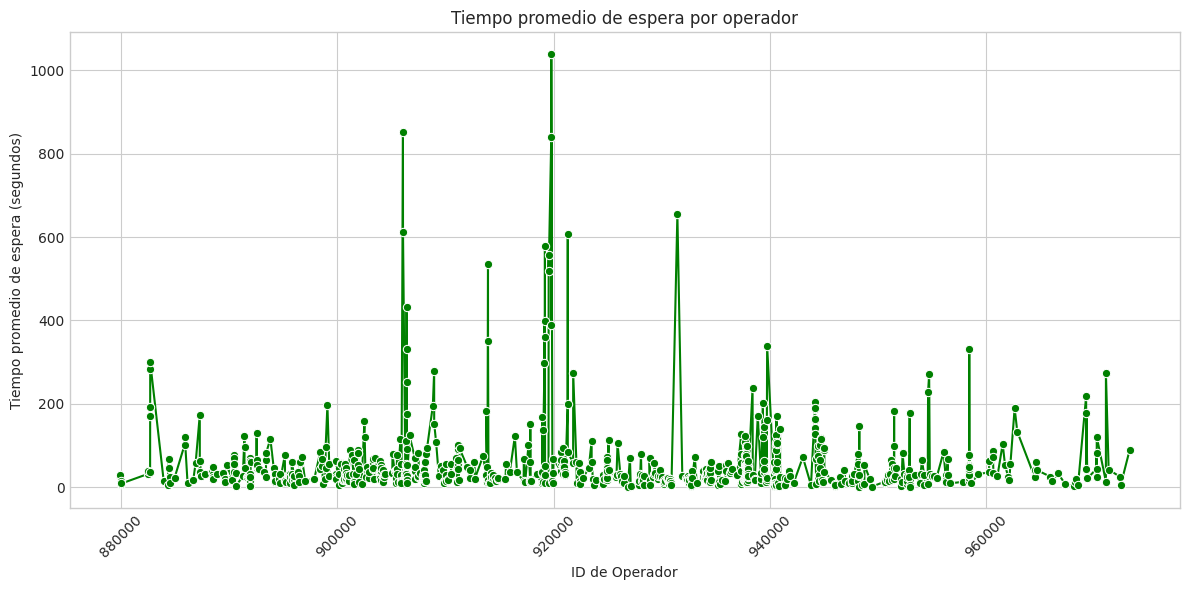

In [37]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=avg_waiting_time,
    x='operator_id',
    y='waiting_time',
    marker='o',
    color='green'
)

plt.title('Tiempo promedio de espera por operador')
plt.xlabel('ID de Operador')
plt.ylabel('Tiempo promedio de espera (segundos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
Q1 = df_incoming['waiting_time'].quantile(0.25)
Q3 = df_incoming['waiting_time'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_incoming_sin_outliers = df_incoming[(df_incoming['waiting_time'] >= lower_bound) & (df_incoming['waiting_time'] <= upper_bound)]


promedio_general_espera = df_incoming_sin_outliers['waiting_time'].mean()


print(f"Promedio general total del tiempo de espera (sin outliers): {promedio_general_espera:.2f} segundos")

Promedio general total del tiempo de espera (sin outliers): 49.21 segundos


<h1 style="font-size:20px;">Tiempo promedio de espera por operador</h1>
 

In [39]:
avg_waiting_time = df_incoming.groupby('operator_id')['waiting_time'].mean().reset_index()


avg_waiting_time.rename(columns={'waiting_time': 'avg_waiting_time'}, inplace=True)


avg_waiting_time = avg_waiting_time.sort_values('avg_waiting_time', ascending=False)


print(avg_waiting_time.head(20))

    operator_id  avg_waiting_time
337    919794.0       1039.540541
206    906070.0        853.312500
335    919790.0        839.802817
445    931458.0        655.236364
207    906076.0        611.500000
358    921318.0        607.466667
328    919204.0        579.277778
333    919552.0        556.776316
288    913938.0        535.047619
334    919554.0        518.154762
217    906406.0        433.461538
326    919166.0        398.647059
336    919792.0        389.484375
329    919206.0        360.909091
289    913942.0        350.855556
556    939762.0        338.574468
708    958460.0        332.705882
216    906404.0        331.420000
12     882690.0        299.833333
325    919164.0        298.733333


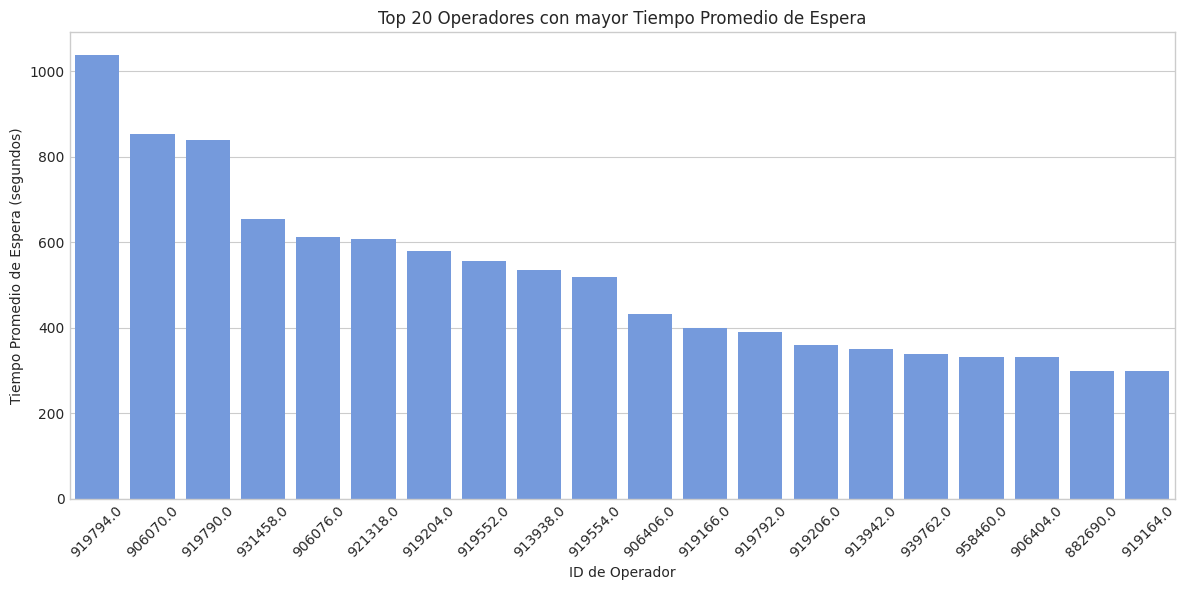

In [40]:
avg_waiting_top20 = avg_waiting_time.sort_values('avg_waiting_time', ascending=False).head(20)


avg_waiting_top20 = avg_waiting_top20.sort_values('avg_waiting_time', ascending=False)


plt.figure(figsize=(12, 6))


sns.barplot(
    data=avg_waiting_top20,
    x='operator_id',
    y='avg_waiting_time',
    color='cornflowerblue',
    order=avg_waiting_top20['operator_id']  
)


plt.title('Top 20 Operadores con mayor Tiempo Promedio de Espera')
plt.xlabel('ID de Operador')
plt.ylabel('Tiempo Promedio de Espera (segundos)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [41]:
avg_waiting_time = df_incoming.groupby('operator_id')['waiting_time'].mean().reset_index()


avg_waiting_time.rename(columns={'waiting_time': 'avg_waiting_time'}, inplace=True)


avg_waiting_time = avg_waiting_time.sort_values('avg_waiting_time', ascending=True)


print(avg_waiting_time.head(20))

    operator_id  avg_waiting_time
675    952954.0          1.000000
644    949420.0          1.000000
636    948282.0          1.000000
677    952982.0          1.142857
404    926872.0          1.428571
582    940828.0          2.000000
735    968150.0          2.000000
557    940430.0          2.517241
51     890618.0          2.617647
663    952114.0          3.000000
617    946020.0          3.000000
64     891948.0          3.000000
453    932672.0          3.333333
406    927142.0          3.750000
683    954318.0          4.000000
571    940596.0          4.000000
752    972460.0          4.000000
572    940610.0          4.000000
416    928382.0          4.222222
407    927908.0          4.333333


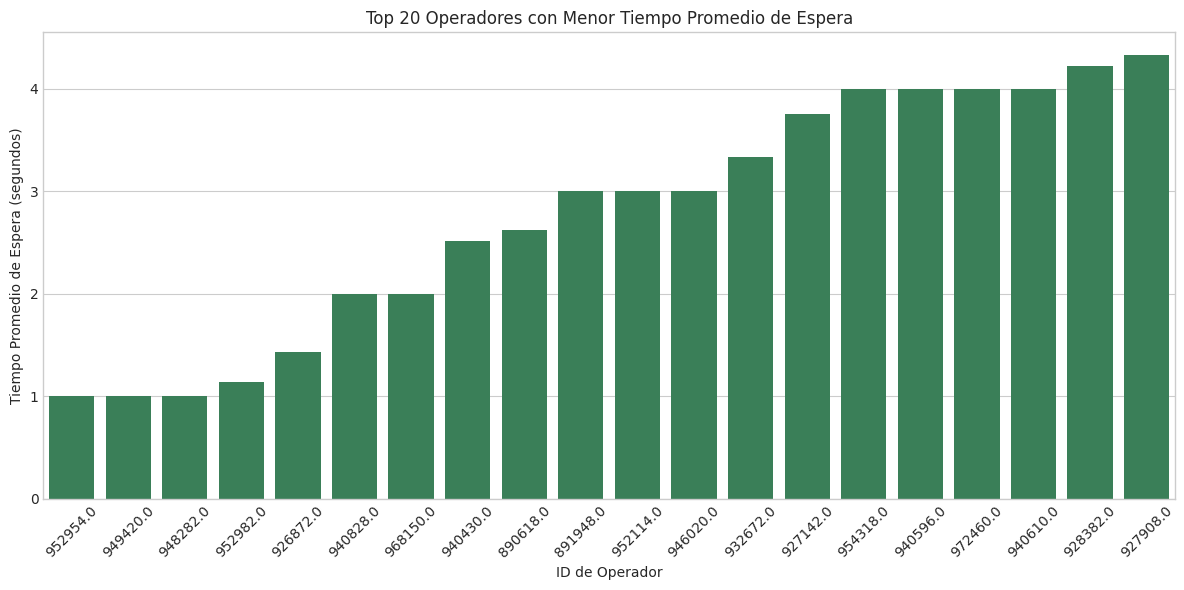

In [42]:
avg_waiting_best20 = avg_waiting_time.sort_values('avg_waiting_time', ascending=True).head(20)


avg_waiting_best20 = avg_waiting_best20.sort_values('avg_waiting_time', ascending=True)


plt.figure(figsize=(12, 6))


sns.barplot(
    data=avg_waiting_best20,
    x='operator_id',
    y='avg_waiting_time',
    color='seagreen',
    order=avg_waiting_best20['operator_id']  
)


plt.title('Top 20 Operadores con Menor Tiempo Promedio de Espera')
plt.xlabel('ID de Operador')
plt.ylabel('Tiempo Promedio de Espera (segundos)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

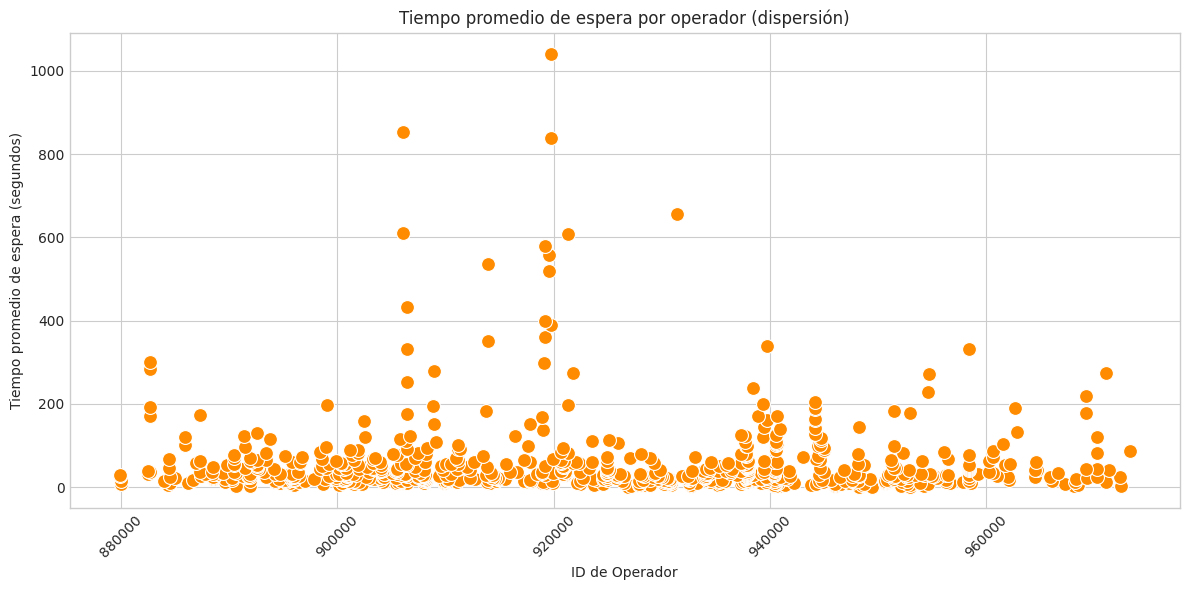

In [43]:
avg_waiting_time_clean = avg_waiting_time[avg_waiting_time['operator_id'] != 'Sin operador'].copy()


avg_waiting_time_clean['operator_id'] = avg_waiting_time_clean['operator_id'].astype(float)


plt.figure(figsize=(12,6))
sns.scatterplot(
    data=avg_waiting_time_clean,
    x='operator_id',
    y='avg_waiting_time',
    color='darkorange',
    s=100
)

plt.title('Tiempo promedio de espera por operador (dispersión)')
plt.xlabel('ID de Operador')
plt.ylabel('Tiempo promedio de espera (segundos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

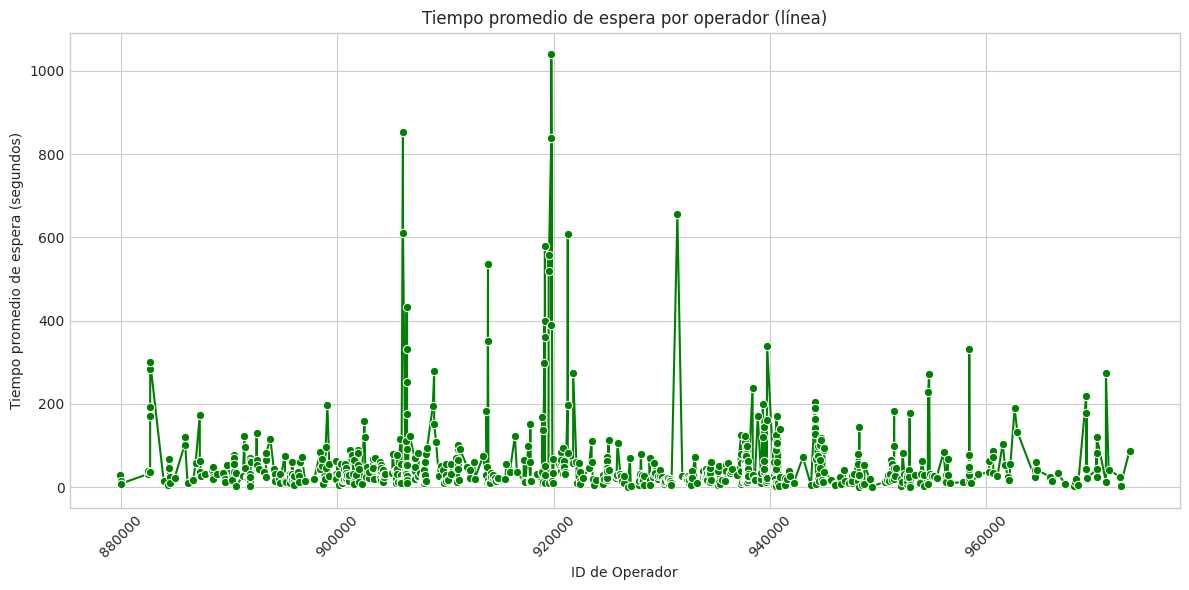

In [44]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=avg_waiting_time_clean.sort_values('avg_waiting_time', ascending=False),
    x='operator_id',
    y='avg_waiting_time',
    marker='o',
    color='green'
)

plt.title('Tiempo promedio de espera por operador (línea)')
plt.xlabel('ID de Operador')
plt.ylabel('Tiempo promedio de espera (segundos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
promedio_espera_por_operador = df_incoming.groupby('operator_id')['waiting_time'].mean().reset_index()


promedio_espera_por_operador.rename(columns={'waiting_time': 'avg_waiting_time'}, inplace=True)


print(promedio_espera_por_operador.head(20))

   operator_id  avg_waiting_time
0     879896.0         26.913043
1     879898.0         28.203125
2     880020.0          7.250000
3     880022.0         14.000000
4     880026.0          7.894737
5     880028.0          8.844444
6     882476.0         31.666667
7     882478.0         38.000000
8     882680.0         37.108696
9     882684.0        191.730769
10    882686.0        169.943662
11    882688.0        284.333333
12    882690.0        299.833333
13    883940.0         14.285714
14    883942.0         15.571429
15    884294.0          6.000000
16    884408.0         67.125000
17    884412.0         45.555556
18    884478.0         24.642857
19    884524.0         10.333333


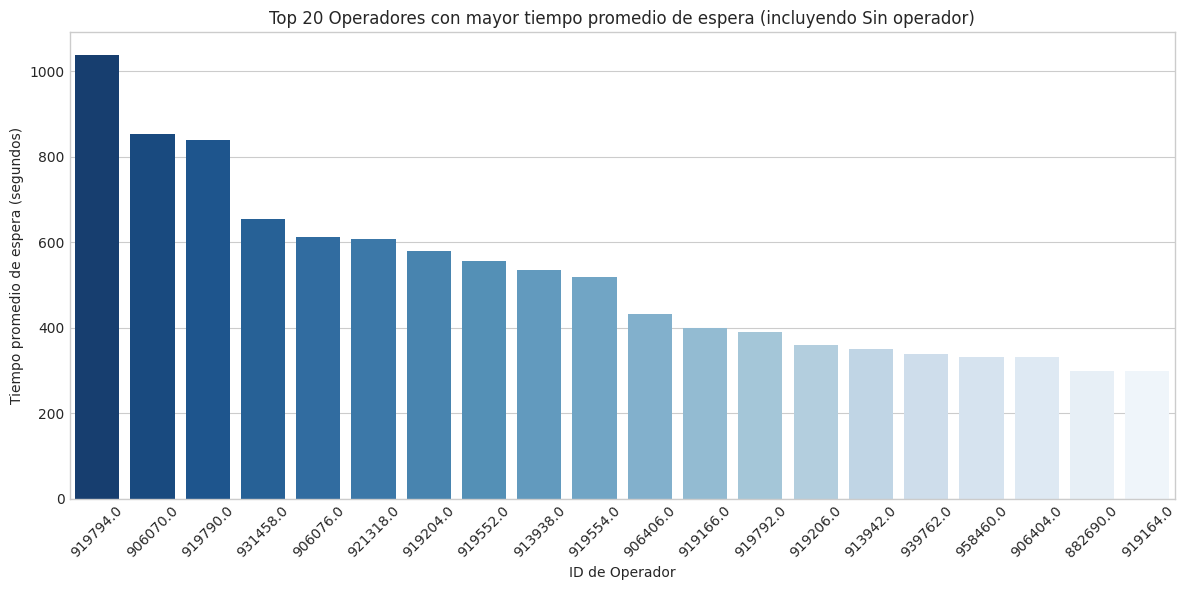

In [46]:
avg_waiting_time = df_incoming.groupby('operator_id')['waiting_time'].mean().reset_index()


avg_waiting_time.rename(columns={'waiting_time': 'avg_waiting_time'}, inplace=True)


avg_waiting_time_sorted = avg_waiting_time.sort_values('avg_waiting_time', ascending=False)


top_20_waiting = avg_waiting_time_sorted.head(20)


plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_20_waiting,
    x='operator_id',
    y='avg_waiting_time',
    palette='Blues_r',
    order=top_20_waiting['operator_id']  # Esto asegura el orden visual
)

plt.title('Top 20 Operadores con mayor tiempo promedio de espera (incluyendo Sin operador)')
plt.xlabel('ID de Operador')
plt.ylabel('Tiempo promedio de espera (segundos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="font-size:20px;">operadores con valores significativamente altos</span>  

In [47]:

umbral_espera_75 = np.percentile(avg_waiting_time['avg_waiting_time'], 75)

print(f"Umbral de tiempo de espera : {umbral_espera_75:.2f} segundos")

Umbral de tiempo de espera : 58.90 segundos


In [48]:
avg_waiting_time = df_incoming.groupby('operator_id')['waiting_time'].mean().reset_index()
avg_waiting_time.rename(columns={'waiting_time': 'avg_waiting_time'}, inplace=True)


avg_waiting_time.head(10)

,operator_id,avg_waiting_time
0,879896.0,26.913043
1,879898.0,28.203125
2,880020.0,7.250000
3,880022.0,14.000000
4,880026.0,7.894737
5,880028.0,8.844444
6,882476.0,31.666667
7,882478.0,38.000000
8,882680.0,37.108696
9,882684.0,191.730769


Umbral de tiempo de espera (percentil 75): 58.90 segundos


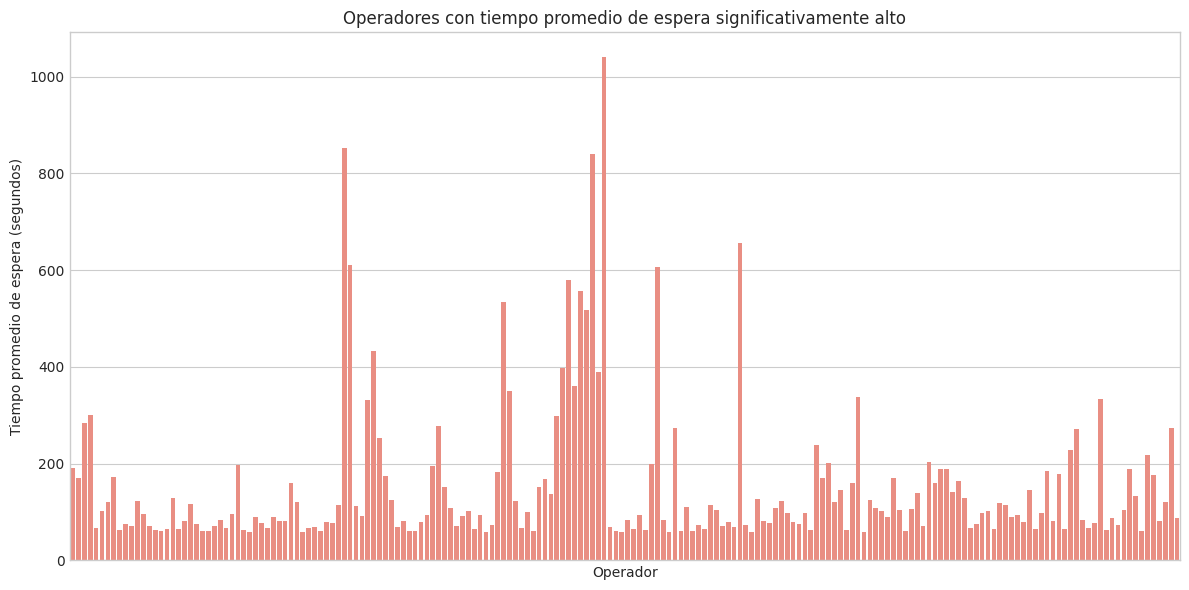

In [49]:
umbral_espera_75 = np.percentile(avg_waiting_time['avg_waiting_time'], 75)
print(f"Umbral de tiempo de espera (percentil 75): {umbral_espera_75:.2f} segundos")


operadores_altos = avg_waiting_time[avg_waiting_time['avg_waiting_time'] > umbral_espera_75]


operadores_altos = operadores_altos[operadores_altos['operator_id'] != 'Sin operador']
operadores_altos['operator_id'] = operadores_altos['operator_id'].astype(float)


plt.figure(figsize=(12,6))
sns.barplot(
    data=operadores_altos.sort_values('avg_waiting_time', ascending=False),
    x='operator_id',
    y='avg_waiting_time',
    color='salmon'
)

plt.title('Operadores con tiempo promedio de espera significativamente alto')
plt.xlabel('Operador')
plt.ylabel('Tiempo promedio de espera (segundos)')


operator_ids = operadores_altos.sort_values('avg_waiting_time', ascending=False)['operator_id']
plt.xticks(
    ticks=[op for op in operator_ids if op % 1000 == 0],
    rotation=45
)

plt.tight_layout()
plt.show()

<h1 style="font-size:20px;">Operadores ineficacez por tiempo de espera</h1> 

In [50]:
df_summary = df_summary.merge(avg_waiting_time, on='operator_id', how='left')

df_summary['ineficaz_espera'] = df_summary['avg_waiting_time'] > umbral_espera_75

df_summary['ineficaz_espera'] = df_summary['avg_waiting_time'] > umbral_espera_75


df_summary.sort_values('avg_waiting_time', ascending=False).head(10)

,operator_id,total_calls,missed_calls,missed_call_percentage,ineficaz_llamadas,avg_waiting_time,ineficaz_espera
337,919794.0,1327,1.0,0.075358,False,1039.540541,True
206,906070.0,361,2.0,0.554017,False,853.312500,True
335,919790.0,1793,0.0,0.000000,False,839.802817,True
445,931458.0,2129,14.0,0.657586,True,655.236364,True
207,906076.0,24,0.0,0.000000,False,611.500000,True
358,921318.0,2485,7.0,0.281690,False,607.466667,True
328,919204.0,1309,9.0,0.687548,True,579.277778,True
333,919552.0,1239,1.0,0.080710,False,556.776316,True
288,913938.0,5221,15.0,0.287301,False,535.047619,True
334,919554.0,1346,11.0,0.817236,True,518.154762,True


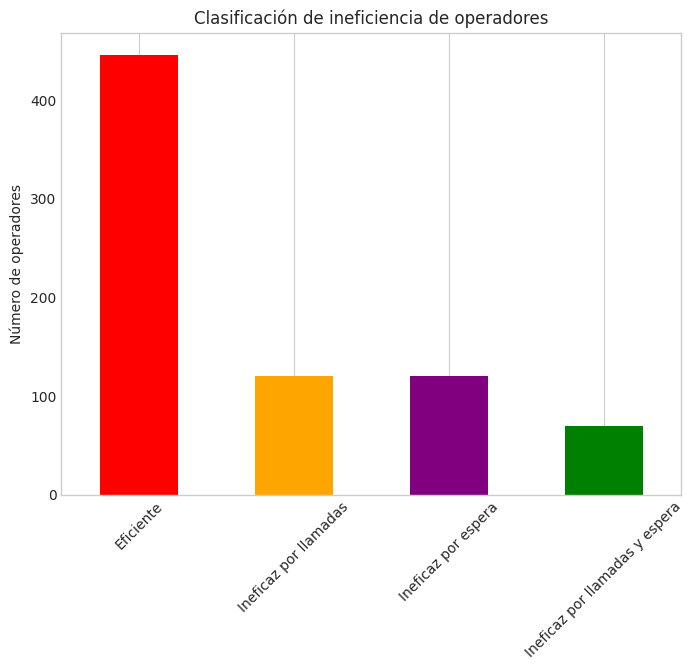

In [52]:
df_summary['categoria_ineficiencia'] = df_summary.apply(
    lambda row: 
    'Ineficaz por llamadas y espera' if row['ineficaz_llamadas'] and row['ineficaz_espera'] else
    'Ineficaz por llamadas' if row['ineficaz_llamadas'] else
    'Ineficaz por espera' if row['ineficaz_espera'] else
    'Eficiente', axis=1
)


conteo = df_summary['categoria_ineficiencia'].value_counts()


plt.figure(figsize=(8,6))
conteo.plot(kind='bar', color=['red', 'orange', 'purple', 'green'])
plt.title('Clasificación de ineficiencia de operadores')
plt.ylabel('Número de operadores')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [53]:
waiting_time_sin_operador = df_incoming[df_incoming['operator_id'] == 'Sin operador']


promedio_espera_sin_operador = waiting_time_sin_operador['waiting_time'].mean()

print(f"Tiempo promedio de espera para 'Sin operador': {promedio_espera_sin_operador:.2f} segundos")

Tiempo promedio de espera para 'Sin operador': 171.24 segundos


<h1 style="font-size:25px;"> Observaciones</h1> 


-Existe diferencia enorme entre el promedio de espera entre los operadores más eficientes teniendo un promedio de respuesta de 1 a 3 segundos contra 400 a 600 segundos en los no eficaces. 


- La mayor parte de los operadores se concentra en puntos o promedio por debajo de 50 segundos sin embargo existen operadores con  que sobrepasan muy por encima el promedio de 50 segundos como lo son  800 a 1000 segundos de espera.


- Aunque las llamadas que no son contestadas por no tener un operador no aparece en el top 20 de ineficientes, estos tienen un tiempo de espera mucho mayor al promedio con un total de 171 segundos. Por lo que nuevamente, es un problema que debe atendencer




Tomando en cuenta lo anterior, las recomendaciones serian las siguientes:


Recomendaciones basadas en los resultados:


Identificar y monitorear operadores que constantemente superan los 50 segundos  de espera.


Incluir esta métrica como parte de un sistema de evaluación semanal por eficiencia operativa y atender principalmente a los operadores que tienen tiempos de espera extremadamente altos que rebasan los 600 seundos de espera, ya que estan muy por arriba de la media.

<h1 style="font-size:25px;"> hipotesis 3  Operadores  que realizan menos llamadas salientes diarias comparados con el promedio son ineficaces</h1> 

<span style="font-size:20px;">Filtrar llamadas salientes y agrupar por operador  promedio diario</span> 

In [54]:
avg_waiting_time = df_incoming.groupby('operator_id')['waiting_time'].mean().reset_index()


avg_waiting_time.rename(columns={'waiting_time': 'avg_waiting_time'}, inplace=True)


avg_waiting_time = avg_waiting_time.sort_values('avg_waiting_time', ascending=False)


print(avg_waiting_time.head(10))

    operator_id  avg_waiting_time
337    919794.0       1039.540541
206    906070.0        853.312500
335    919790.0        839.802817
445    931458.0        655.236364
207    906076.0        611.500000
358    921318.0        607.466667
328    919204.0        579.277778
333    919552.0        556.776316
288    913938.0        535.047619
334    919554.0        518.154762


In [55]:
avg_waiting_time = df_incoming.groupby('operator_id')['waiting_time'].mean().reset_index()


avg_waiting_time.rename(columns={'waiting_time': 'avg_waiting_time'}, inplace=True)


avg_waiting_time = avg_waiting_time.sort_values('avg_waiting_time', ascending=True)


print(avg_waiting_time.head(10))

    operator_id  avg_waiting_time
675    952954.0          1.000000
644    949420.0          1.000000
636    948282.0          1.000000
677    952982.0          1.142857
404    926872.0          1.428571
582    940828.0          2.000000
735    968150.0          2.000000
557    940430.0          2.517241
51     890618.0          2.617647
663    952114.0          3.000000


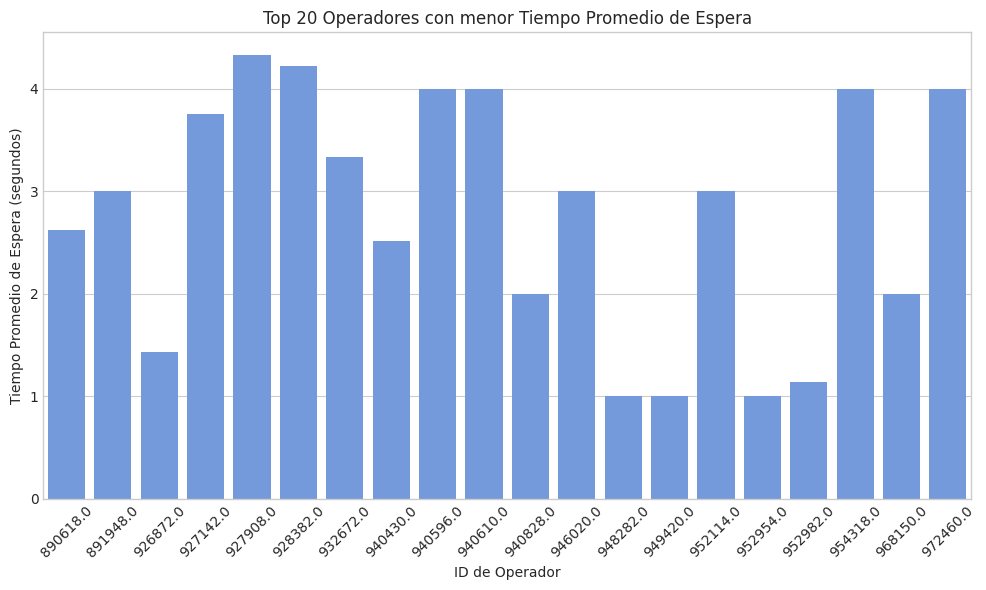

In [56]:
top_20_best_waiting = avg_waiting_time.sort_values('avg_waiting_time', ascending=True).head(20)


plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_20_best_waiting,
    x='operator_id',
    y='avg_waiting_time',
    color='cornflowerblue'
)


plt.title('Top 20 Operadores con menor Tiempo Promedio de Espera')
plt.xlabel('ID de Operador')
plt.ylabel('Tiempo Promedio de Espera (segundos)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [57]:
df_outgoing = df_telecom[df_telecom['direction'] == 'out'].copy()


calls_per_day = df_outgoing.groupby(['operator_id', 'date'])['calls_count'].sum().reset_index()


avg_daily_calls = calls_per_day.groupby('operator_id')['calls_count'].mean().reset_index()


avg_daily_calls.rename(columns={'calls_count': 'avg_outgoing_calls_per_day'}, inplace=True)


Q1 = avg_daily_calls['avg_outgoing_calls_per_day'].quantile(0.25)
Q3 = avg_daily_calls['avg_outgoing_calls_per_day'].quantile(0.75)
IQR = Q3 - Q1


filtered_avg_daily_calls = avg_daily_calls[
    (avg_daily_calls['avg_outgoing_calls_per_day'] >= (Q1 - 1.5 * IQR)) &
    (avg_daily_calls['avg_outgoing_calls_per_day'] <= (Q3 + 1.5 * IQR))
]


global_avg = filtered_avg_daily_calls['avg_outgoing_calls_per_day'].mean()

print(f"Promedio global de llamadas salientes diarias (sin valores atípicos): {global_avg:.2f}")

Promedio global de llamadas salientes diarias (sin valores atípicos): 12.83


<span style="font-size:20px;">Operadores con menos de 13 llamadas al dia</span>  

In [58]:
umbral_llamadas = 16


avg_daily_calls['is_inefficient_outbound'] = avg_daily_calls['avg_outgoing_calls_per_day'] < umbral_llamadas


inefficient_operators = avg_daily_calls[avg_daily_calls['is_inefficient_outbound'] == True]


inefficient_operators_sorted = inefficient_operators.sort_values('avg_outgoing_calls_per_day', ascending=False)


inefficient_operators_sorted.head(20)

,operator_id,avg_outgoing_calls_per_day,is_inefficient_outbound
220,906394.0,15.972222,True
414,922476.0,15.923077,True
677,944766.0,15.888889,True
53,890422.0,15.709677,True
32,887992.0,15.666667,True
824,959312.0,15.600000,True
289,914238.0,15.583333,True
11,882688.0,15.500000,True
204,905566.0,15.423729,True
618,940438.0,15.407407,True


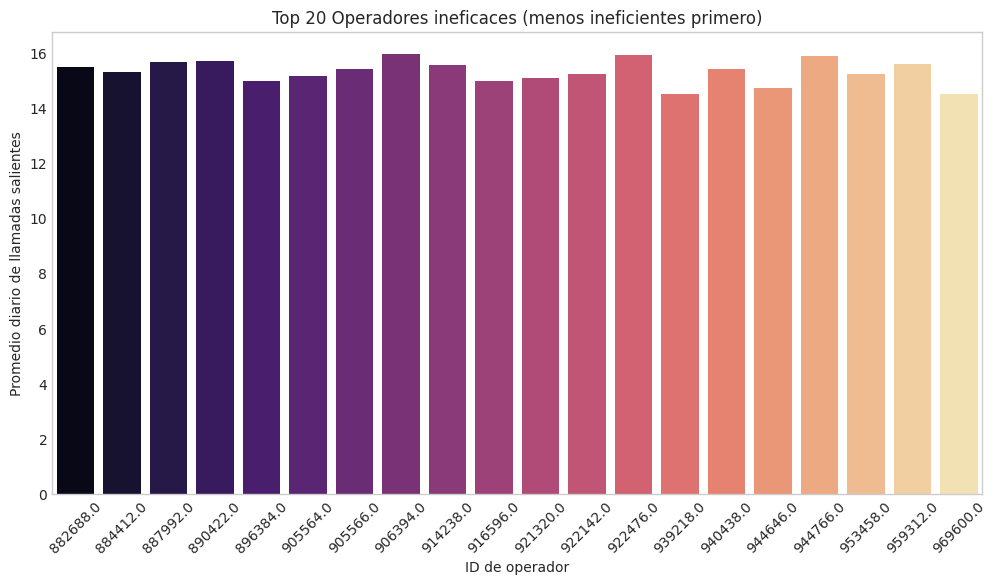

In [59]:
top_20_inefficient = inefficient_operators_sorted.head(20)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_20_inefficient,
    x='operator_id',
    y='avg_outgoing_calls_per_day',
    palette='magma'
)
plt.title('Top 20 Operadores ineficaces (menos ineficientes primero)')
plt.xlabel('ID de operador')
plt.ylabel('Promedio diario de llamadas salientes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [60]:
umbral_llamadas = 13


avg_daily_calls['is_inefficient_outbound'] = avg_daily_calls['avg_outgoing_calls_per_day'] < umbral_llamadas


inefficient_operators = avg_daily_calls[avg_daily_calls['is_inefficient_outbound'] == True]


inefficient_operators_sorted = inefficient_operators.sort_values('avg_outgoing_calls_per_day', ascending=False)


inefficient_operators_sorted.head(20)

,operator_id,avg_outgoing_calls_per_day,is_inefficient_outbound
276,912296.0,12.775000,True
40,889410.0,12.689655,True
846,965232.0,12.666667,True
280,913868.0,12.500000,True
9,882684.0,12.431034,True
666,944222.0,12.400000,True
581,937988.0,12.347826,True
71,891746.0,12.333333,True
807,958432.0,12.214286,True
137,899972.0,12.187500,True


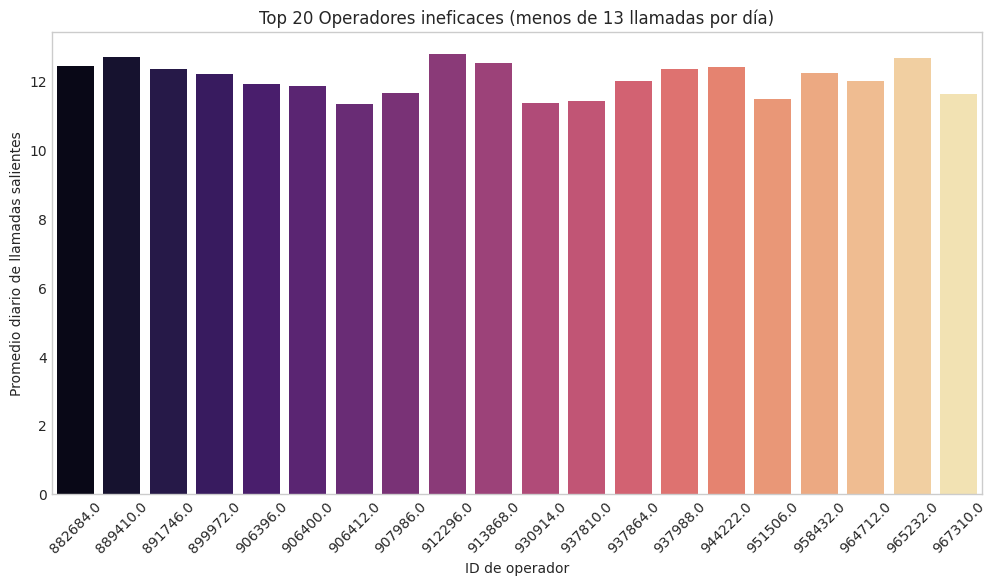

In [61]:
umbral_llamadas = 13


avg_daily_calls['is_inefficient_outbound'] = avg_daily_calls['avg_outgoing_calls_per_day'] < umbral_llamadas


inefficient_operators = avg_daily_calls[avg_daily_calls['is_inefficient_outbound'] == True]


inefficient_operators_sorted = inefficient_operators.sort_values('avg_outgoing_calls_per_day', ascending=False)


top_20_inefficient = inefficient_operators_sorted.head(20)


plt.figure(figsize=(12,6))
sns.barplot(
    data=top_20_inefficient,
    x='operator_id',
    y='avg_outgoing_calls_per_day',
    palette='magma'
)
plt.title('Top 20 Operadores ineficaces (menos de 13 llamadas por día)')
plt.xlabel('ID de operador')
plt.ylabel('Promedio diario de llamadas salientes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [62]:
df_salientes = df_telecom[
    (df_telecom['direction'] == 'out') & 
    (df_telecom['internal'] == False)
]


llamadas_por_dia = df_salientes.groupby(['operator_id', 'date'])['calls_count'].sum().reset_index()


promedio_diario = llamadas_por_dia.groupby('operator_id')['calls_count'].mean().reset_index()
promedio_diario.columns = ['operator_id', 'promedio_llamadas_por_dia']


operadores_eficientes = promedio_diario[promedio_diario['promedio_llamadas_por_dia'] > 13]


print(f"Número de operadores con más de 13 llamadas salientes por día: {len(operadores_eficientes)}")
operadores_eficientes.head(20)

Número de operadores con más de 13 llamadas salientes por día: 339


,operator_id,promedio_llamadas_por_dia
0,879896.0,21.104167
1,879898.0,99.202532
4,880026.0,31.077922
5,880028.0,36.243590
9,882686.0,40.051948
10,882688.0,15.500000
11,882690.0,75.666667
14,883940.0,42.875000
15,883942.0,39.070175
18,884412.0,15.222222


In [63]:

total_operadores = promedio_diario['operator_id'].nunique()


operadores_eficientes = promedio_diario[promedio_diario['promedio_llamadas_por_dia'] > 13]
num_eficientes = len(operadores_eficientes)


porcentaje_eficientes = (num_eficientes / total_operadores) * 100


print(f"Total de operadores: {total_operadores}")
print(f"Número de operadores con más de 13 llamadas por día: {num_eficientes}")
print(f"Porcentaje de operadores con más de 13 llamadas por día: {porcentaje_eficientes:.2f}%")

Total de operadores: 834
Número de operadores con más de 13 llamadas por día: 339
Porcentaje de operadores con más de 13 llamadas por día: 40.65%


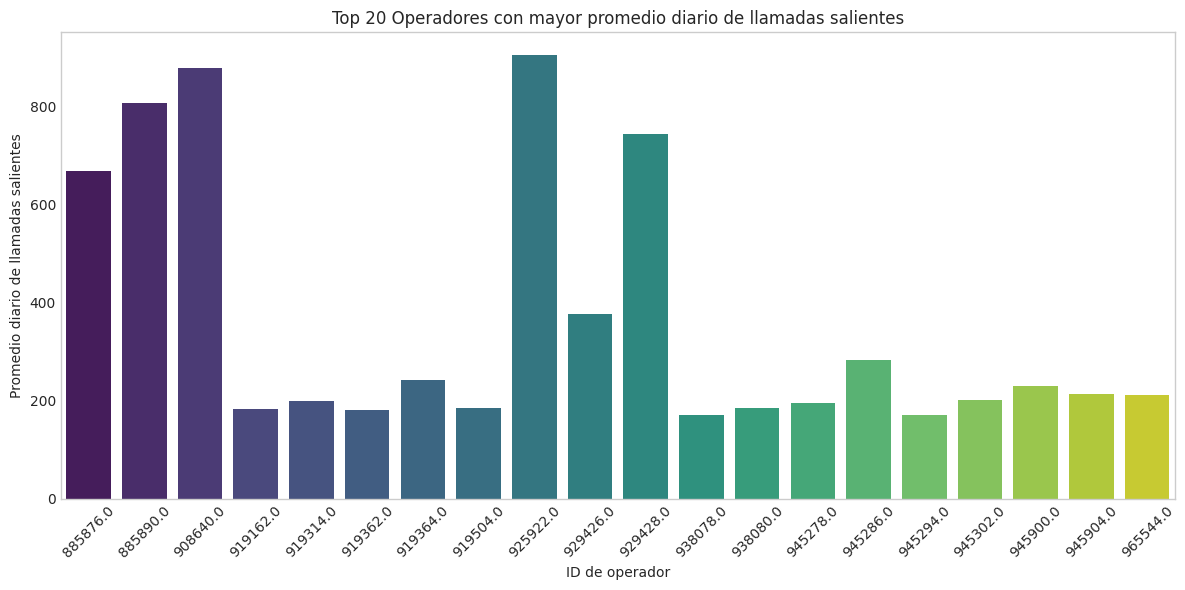

In [64]:

top_20_operators = avg_daily_calls.sort_values('avg_outgoing_calls_per_day', ascending=False).head(20)


plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_20_operators,
    x='operator_id',
    y='avg_outgoing_calls_per_day',
    palette='viridis'
)
plt.title('Top 20 Operadores con mayor promedio diario de llamadas salientes')
plt.xlabel('ID de operador')
plt.ylabel('Promedio diario de llamadas salientes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [65]:
avg_daily_calls_sorted = avg_daily_calls.sort_values('avg_outgoing_calls_per_day', ascending=True)


avg_daily_calls_sorted = avg_daily_calls_sorted.rename(columns={'avg_outgoing_calls_per_day': 'promedio_llamadas_por_dia'})


top_20_lowest = avg_daily_calls_sorted.head(20)


print(top_20_lowest)

    operator_id  promedio_llamadas_por_dia  is_inefficient_outbound
452    927142.0                        1.0                     True
781    954086.0                        1.0                     True
782    954284.0                        1.0                     True
783    954318.0                        1.0                     True
330    918888.0                        1.0                     True
335    918988.0                        1.0                     True
556    937778.0                        1.0                     True
554    937772.0                        1.0                     True
553    937770.0                        1.0                     True
104    895598.0                        1.0                     True
102    895266.0                        1.0                     True
325    917876.0                        1.0                     True
793    955086.0                        1.0                     True
545    937720.0                        1.0      

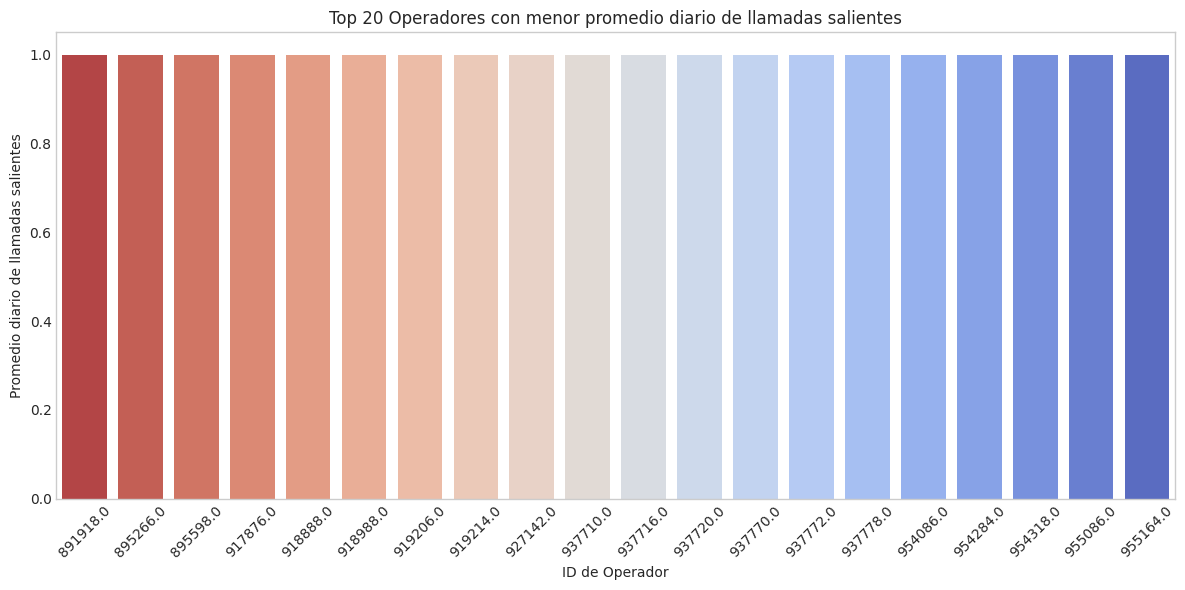

In [66]:
avg_daily_calls_sorted = avg_daily_calls.sort_values('avg_outgoing_calls_per_day', ascending=True)


top_20_lowest = avg_daily_calls_sorted.head(20)


plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_20_lowest,
    x='operator_id',
    y='avg_outgoing_calls_per_day',
    palette='coolwarm_r'
)

plt.title('Top 20 Operadores con menor promedio diario de llamadas salientes')
plt.xlabel('ID de Operador')
plt.ylabel('Promedio diario de llamadas salientes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<span style="font-size:20px;">Comparar cada operador con el promedio global</span> 

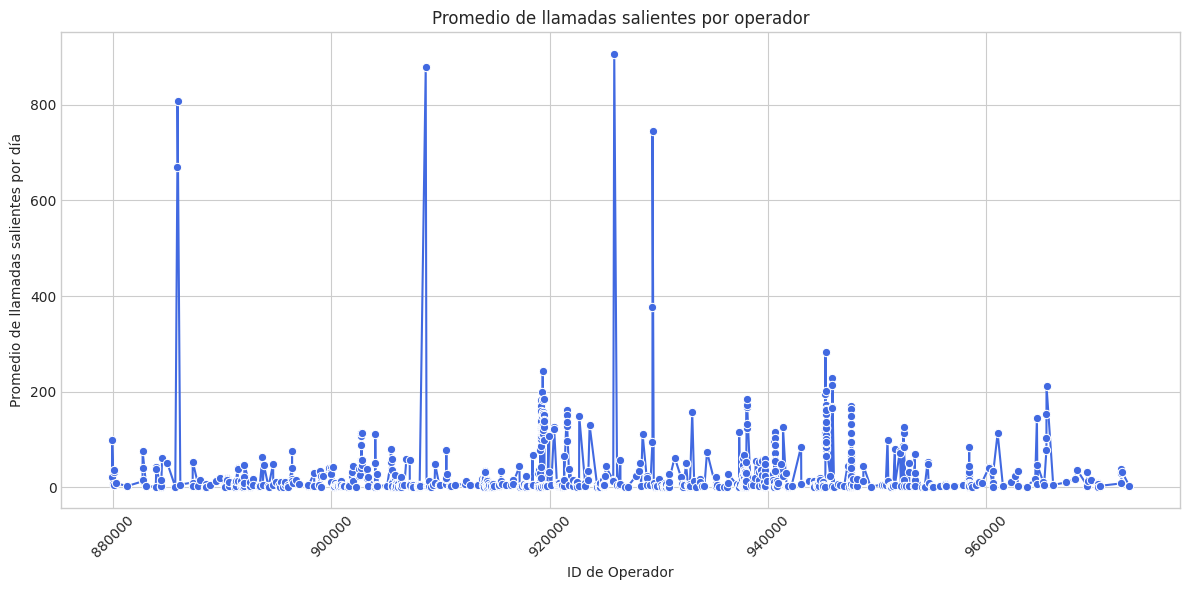

In [67]:

df_salientes = df_telecom[
    (df_telecom['direction'] == 'out') & 
    (df_telecom['internal'] == False)
]


llamadas_por_dia = df_salientes.groupby(['operator_id', 'date'])['calls_count'].sum().reset_index()


promedio_diario = llamadas_por_dia.groupby('operator_id')['calls_count'].mean().reset_index()
promedio_diario.columns = ['operator_id', 'promedio_llamadas_por_dia']


promedio_diario = promedio_diario[promedio_diario['operator_id'] != 'Sin operador']


promedio_diario['operator_id'] = promedio_diario['operator_id'].astype(float)


promedio_diario_sorted = promedio_diario.sort_values('promedio_llamadas_por_dia', ascending=False)


plt.figure(figsize=(12,6))
sns.lineplot(
    data=promedio_diario_sorted,
    x='operator_id',
    y='promedio_llamadas_por_dia',
    marker='o',
    color='royalblue'
)

plt.title('Promedio de llamadas salientes por operador')
plt.xlabel('ID de Operador')
plt.ylabel('Promedio de llamadas salientes por día')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Operadores por debajo del promedio de llamadas (menos del 70%)

In [68]:
threshold_ratio = 0.7  

avg_daily_calls['is_much_below_avg'] = avg_daily_calls['avg_outgoing_calls_per_day'] < (global_avg * threshold_ratio)


operators_below_avg = avg_daily_calls[avg_daily_calls['is_much_below_avg'] == True]


operators_below_avg = operators_below_avg.sort_values('avg_outgoing_calls_per_day', ascending=True)


operators_below_avg.head(20)

,operator_id,avg_outgoing_calls_per_day,is_inefficient_outbound,is_much_below_avg
297,914440.0,1.0,True,True
680,945058.0,1.0,True,True
351,919214.0,1.0,True,True
350,919206.0,1.0,True,True
335,918988.0,1.0,True,True
330,918888.0,1.0,True,True
325,917876.0,1.0,True,True
682,945274.0,1.0,True,True
710,946072.0,1.0,True,True
868,970240.0,1.0,True,True


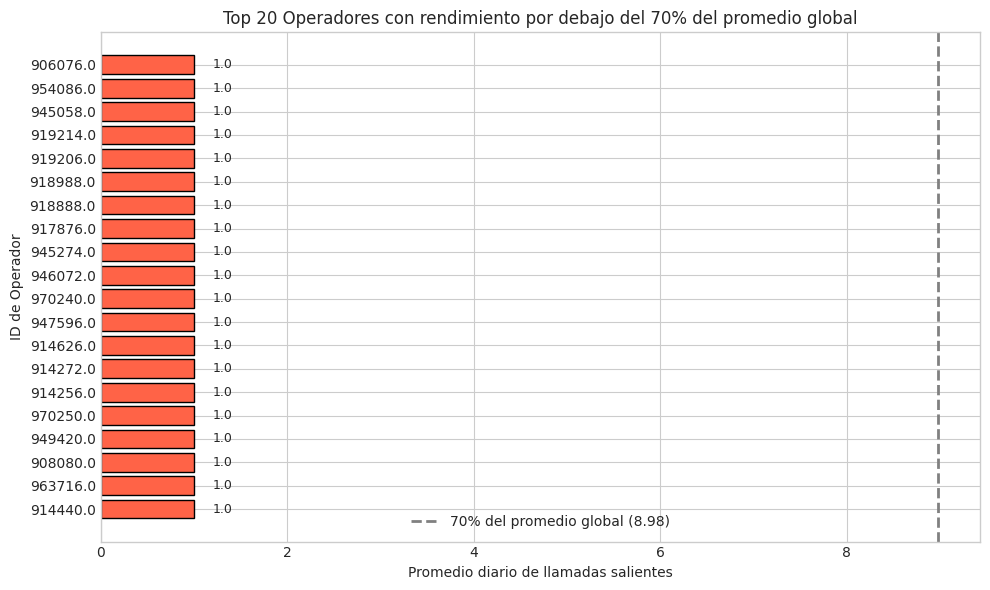

In [69]:
plot_data = operators_below_avg.head(20).sort_values('avg_outgoing_calls_per_day')

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')


bars = plt.barh(
    plot_data['operator_id'].astype(str),
    plot_data['avg_outgoing_calls_per_day'],
    color='tomato',
    edgecolor='black'
)


threshold_value = global_avg * threshold_ratio
plt.axvline(threshold_value, color='gray', linestyle='--', linewidth=2, label=f'70% del promedio global ({threshold_value:.2f})')


for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2, f'{width:.1f}', va='center', fontsize=9)


plt.xlabel('Promedio diario de llamadas salientes')
plt.ylabel('ID de Operador')
plt.title('Top 20 Operadores con rendimiento por debajo del 70% del promedio global')
plt.legend()
plt.tight_layout()
plt.show()

In [70]:

threshold_value = global_avg * 0.7


operators_below_70pct = avg_daily_calls[avg_daily_calls['avg_outgoing_calls_per_day'] < threshold_value]


total_below_70pct = operators_below_70pct.shape[0]

print(f"Número total de operadores con rendimiento por debajo del 70% del promedio global: {total_below_70pct}")

Número total de operadores con rendimiento por debajo del 70% del promedio global: 478


<h1 style="font-size:35px;">Observaciones:</h1> 

Despues de analizar la informacion obtenida analizando a los operadores con menos de 13 llamadas por dia (que es la mitad del promedio general) se puede observar lo siguiente:


Al igual que en el tiempo de espera promedio, tambien en el número de llamadas salientes hay una diferencia muy notable entre los operadores eficaces con un número promedio de 180 a 250 llamadas salientes contra los menos eficientes que en promedio tienen solo de una a tres


El promedio general de llamadas salientes de 13 llamadas por día, sin embargo el número de operadores con más de 13 llamadas por día es de 339 que representa el 40.65% total de los operadores, por lo que el60 % se pueden categorizar como ineficientes.



Tomando en cuenta lo anterior se puede tomar en cuenta las siguientes recomendaciones:


Recomendaciones derivadas

Poner más enfasis en los operadores que realizan menos de 13 llamadas por dia.

Capacitar principalmente a los operadores menos eficaces con un promedio de una o dos llamadas por día.






<h1 style="font-size:30px;">Pruebas de hipotesis</h1>  

Estadístico t: -5.3308
Valor p: 0.0011
Media Grupo A (<30%): 1.23%
Media Grupo B (≥30%): 58.99%


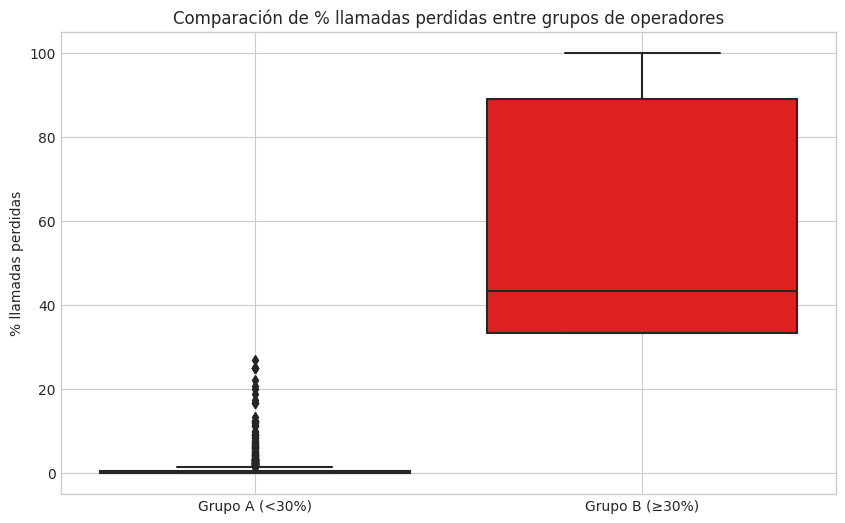

In [71]:
df_incoming = df_telecom[df_telecom['direction'] == 'in']


total_calls = df_incoming.groupby('operator_id')['calls_count'].sum()
missed_calls = df_incoming[df_incoming['is_missed_call'] == True].groupby('operator_id')['calls_count'].sum()


df_summary = pd.DataFrame({
    'total_calls': total_calls,
    'missed_calls': missed_calls
}).fillna(0)


df_summary['missed_call_percentage'] = (df_summary['missed_calls'] / df_summary['total_calls']) * 100


df_summary = df_summary[df_summary['total_calls'] > 0]


group_a = df_summary[df_summary['missed_call_percentage'] < 30]['missed_call_percentage']
group_b = df_summary[df_summary['missed_call_percentage'] >= 30]['missed_call_percentage']


t_stat, p_value = ttest_ind(group_a, group_b, equal_var=False)


print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')
print(f'Media Grupo A (<30%): {group_a.mean():.2f}%')
print(f'Media Grupo B (≥30%): {group_b.mean():.2f}%')



plt.figure(figsize=(10, 6))
sns.boxplot(data=[group_a, group_b], palette=['green', 'red'])
plt.xticks([0, 1], ['Grupo A (<30%)', 'Grupo B (≥30%)'])
plt.title('Comparación de % llamadas perdidas entre grupos de operadores')
plt.ylabel('% llamadas perdidas')
plt.grid(True)
plt.show()

<h1 style="font-size:20px;">Hipotesis cruzada (como extra)</h1>  

In [72]:
low_outbound_threshold = 10


avg_daily_calls['is_low_outbound'] = avg_daily_calls['avg_outgoing_calls_per_day'] < low_outbound_threshold

In [73]:
df_in = df_telecom[df_telecom['direction'] == 'in']


call_loss = df_in.groupby('operator_id').agg(
    total_calls=('calls_count', 'sum'),
    missed_calls=('is_missed_call', 'sum')
).reset_index()


call_loss['missed_call_rate'] = call_loss['missed_calls'] / call_loss['total_calls']

In [74]:

merged = call_loss.merge(avg_daily_calls[['operator_id', 'is_low_outbound']], on='operator_id', how='inner')


low_outbound = merged[merged['is_low_outbound'] == True]['missed_call_rate']
high_outbound = merged[merged['is_low_outbound'] == False]['missed_call_rate']


stat, p = mannwhitneyu(low_outbound, high_outbound, alternative='two-sided')

print(f'Estadístico U: {stat:.2f}')
print(f'Valor p: {p:.4f}')

Estadístico U: 30578.50
Valor p: 0.0013


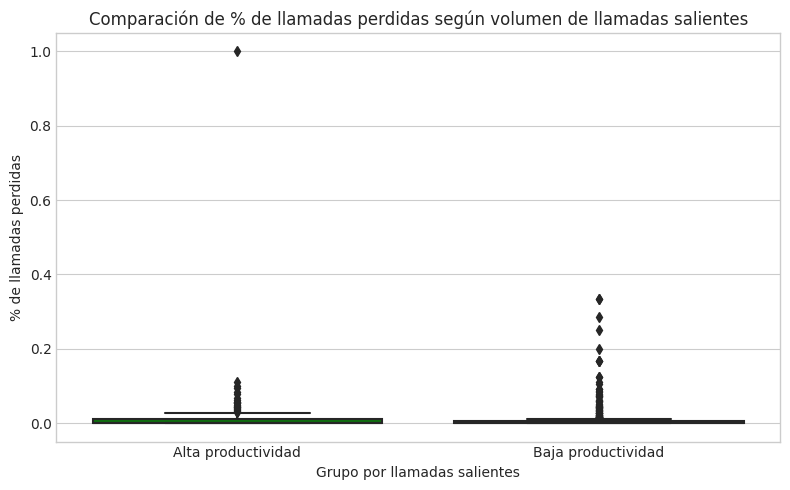

In [75]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged, x='is_low_outbound', y='missed_call_rate',
            palette={True: 'red', False: 'green'})
plt.xticks([0, 1], ['Alta productividad', 'Baja productividad'])
plt.title('Comparación de % de llamadas perdidas según volumen de llamadas salientes')
plt.xlabel('Grupo por llamadas salientes')
plt.ylabel('% de llamadas perdidas')
plt.tight_layout()
plt.show()

<h1 style="font-size:20px;">Hipotesis 2</h1> 

Estadístico t: -11.9340
Valor p: 0.0000
Media Grupo A (≤50s): 23.56 s
Media Grupo B (>50s): 134.26 s


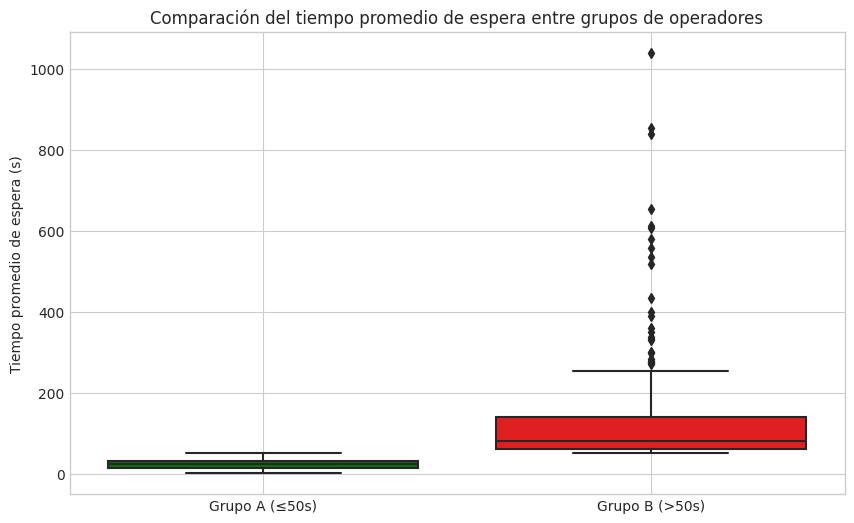

In [76]:

df_incoming = df_telecom[df_telecom['direction'] == 'in'].copy()


df_incoming['tiempo_espera'] = df_incoming['total_call_duration'] - df_incoming['call_duration']


espera_por_operador = df_incoming.groupby('operator_id')['tiempo_espera'].mean()


espera_por_operador = espera_por_operador[espera_por_operador.notnull()]


group_a = espera_por_operador[espera_por_operador <= 50]
group_b = espera_por_operador[espera_por_operador > 50]


t_stat, p_value = ttest_ind(group_a, group_b, equal_var=False)


print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')
print(f'Media Grupo A (≤50s): {group_a.mean():.2f} s')
print(f'Media Grupo B (>50s): {group_b.mean():.2f} s')


plt.figure(figsize=(10, 6))
sns.boxplot(data=[group_a, group_b], palette=['green', 'red'])
plt.xticks([0, 1], ['Grupo A (≤50s)', 'Grupo B (>50s)'])
plt.title('Comparación del tiempo promedio de espera entre grupos de operadores')
plt.ylabel('Tiempo promedio de espera (s)')
plt.grid(True)
plt.show()

Hipotesis cruzada (como extra)

In [77]:
df_in = df_telecom[df_telecom['direction'] == 'in'].copy()


call_loss = df_in.groupby('operator_id').agg(
    total_calls=('calls_count', 'sum'),
    missed_calls=('is_missed_call', 'sum')
).reset_index()


call_loss['missed_call_rate'] = call_loss['missed_calls'] / call_loss['total_calls']

In [78]:
threshold_missed = call_loss['missed_call_rate'].quantile(0.75)


call_loss['is_high_missed_rate'] = call_loss['missed_call_rate'] > threshold_missed



df_in['waiting_time'] = df_in['total_call_duration'] - df_in['call_duration']


waiting_summary = df_in.groupby('operator_id')['waiting_time'].mean().reset_index()
waiting_summary.rename(columns={'waiting_time': 'avg_waiting_time'}, inplace=True)



merged = call_loss.merge(waiting_summary, on='operator_id', how='inner')



high_missed = merged[merged['is_high_missed_rate'] == True]['avg_waiting_time']
low_missed = merged[merged['is_high_missed_rate'] == False]['avg_waiting_time']


stat, p_value = mannwhitneyu(high_missed, low_missed, alternative='two-sided')

print(f'Estadístico U: {stat:.2f}')
print(f'Valor p: {p_value:.4f}')
print("Promedio de espera (alto % llamadas perdidas):", high_missed.mean())
print("Promedio de espera (bajo % llamadas perdidas):", low_missed.mean())

Estadístico U: 69380.50
Valor p: 0.0000
Promedio de espera (alto % llamadas perdidas): 69.14863375405085
Promedio de espera (bajo % llamadas perdidas): 53.7077336615928


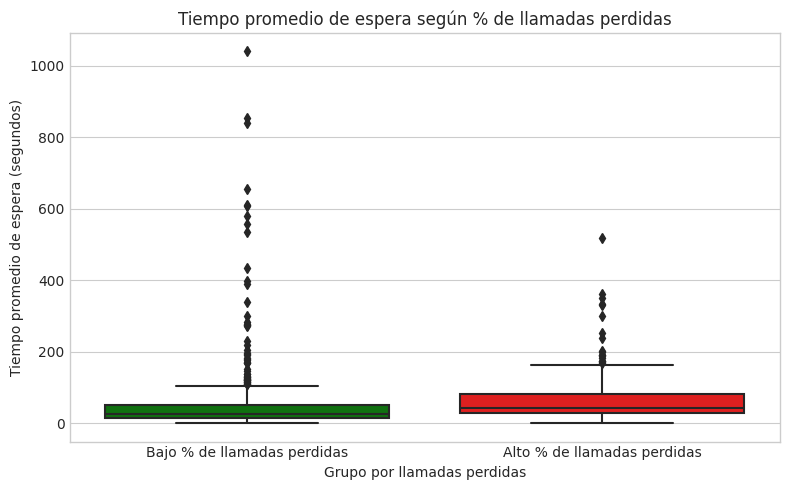

In [79]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged, x='is_high_missed_rate', y='avg_waiting_time',
            palette={True: 'red', False: 'green'})
plt.xticks([0, 1], ['Bajo % de llamadas perdidas', 'Alto % de llamadas perdidas'])
plt.title('Tiempo promedio de espera según % de llamadas perdidas')
plt.xlabel('Grupo por llamadas perdidas')
plt.ylabel('Tiempo promedio de espera (segundos)')
plt.tight_layout()
plt.show()

<h1 style="font-size:20px;">Hipotesis 3</h1> 

Estadístico t: 12.7663
Valor p: 0.0000
Media Grupo A (≥13): 76.55 llamadas/día
Media Grupo B (<13): 4.07 llamadas/día
Tamaño Grupo A: 340 operadores
Tamaño Grupo B: 494 operadores


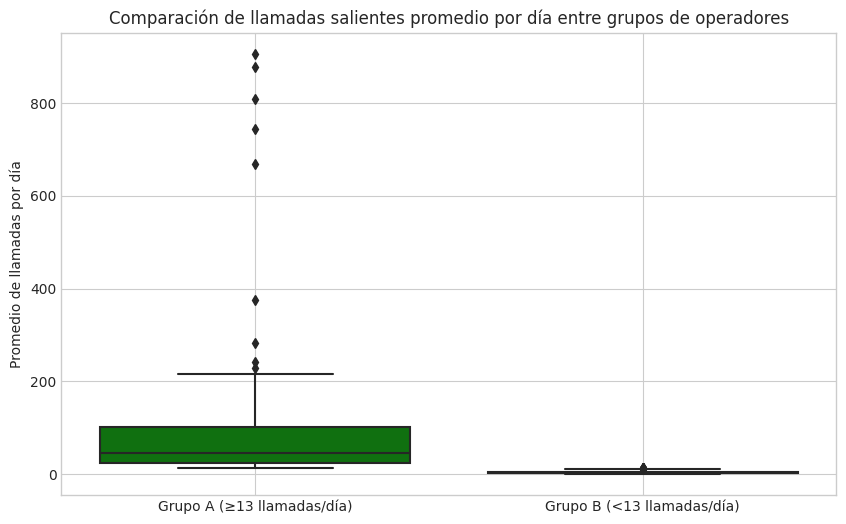

In [80]:
df_outgoing = df_telecom[(df_telecom['direction'] == 'out') & (df_telecom['internal'] == False)].copy()


llamadas_diarias = df_outgoing.groupby(['operator_id', 'date'])['calls_count'].sum().reset_index()


promedio_por_operador = llamadas_diarias.groupby('operator_id')['calls_count'].mean().reset_index()
promedio_por_operador.columns = ['operator_id', 'promedio_llamadas_diarias']


group_a = promedio_por_operador[promedio_por_operador['promedio_llamadas_diarias'] >= 13]['promedio_llamadas_diarias']
group_b = promedio_por_operador[promedio_por_operador['promedio_llamadas_diarias'] < 13]['promedio_llamadas_diarias']


t_stat, p_value = ttest_ind(group_a, group_b, equal_var=False)


print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')
print(f'Media Grupo A (≥13): {group_a.mean():.2f} llamadas/día')
print(f'Media Grupo B (<13): {group_b.mean():.2f} llamadas/día')
print(f'Tamaño Grupo A: {len(group_a)} operadores')
print(f'Tamaño Grupo B: {len(group_b)} operadores')


plt.figure(figsize=(10, 6))
sns.boxplot(data=[group_a, group_b], palette=['green', 'red'])
plt.xticks([0, 1], ['Grupo A (≥13 llamadas/día)', 'Grupo B (<13 llamadas/día)'])
plt.title('Comparación de llamadas salientes promedio por día entre grupos de operadores')
plt.ylabel('Promedio de llamadas por día')
plt.grid(True)
plt.show()

Estadístico t: -11.9340
Valor p: 0.0000
Media Grupo A (≤50s): 23.56 s
Media Grupo B (>50s): 134.26 s
Tamaño Grupo A: 523 operadores
Tamaño Grupo B: 232 operadores


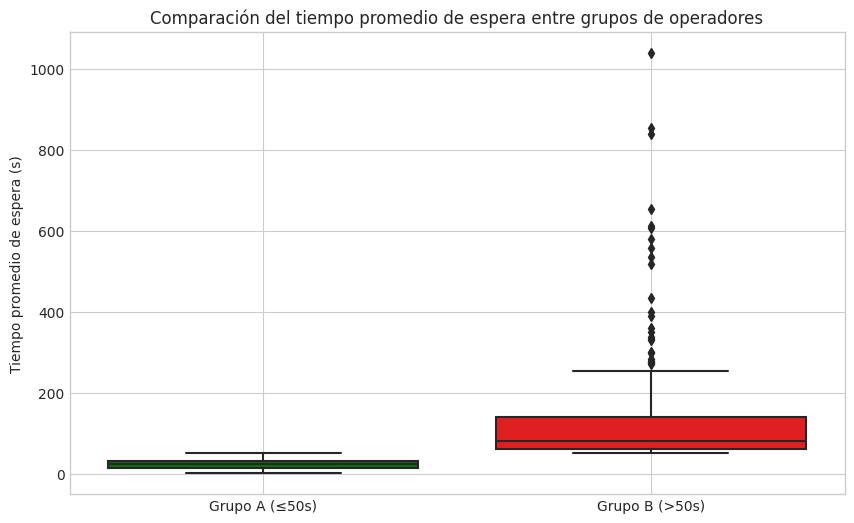

In [81]:
df_incoming = df_telecom[df_telecom['direction'] == 'in'].copy()


df_incoming['tiempo_espera'] = df_incoming['total_call_duration'] - df_incoming['call_duration']


espera_por_operador = df_incoming.groupby('operator_id')['tiempo_espera'].mean()


espera_por_operador = espera_por_operador[espera_por_operador.notnull()]


group_a = espera_por_operador[espera_por_operador <= 50]
group_b = espera_por_operador[espera_por_operador > 50]


t_stat, p_value = ttest_ind(group_a, group_b, equal_var=False)


print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')
print(f'Media Grupo A (≤50s): {group_a.mean():.2f} s')
print(f'Media Grupo B (>50s): {group_b.mean():.2f} s')
print(f'Tamaño Grupo A: {len(group_a)} operadores')
print(f'Tamaño Grupo B: {len(group_b)} operadores')


plt.figure(figsize=(10, 6))
sns.boxplot(data=[group_a, group_b], palette=['green', 'red'])
plt.xticks([0, 1], ['Grupo A (≤50s)', 'Grupo B (>50s)'])
plt.title('Comparación del tiempo promedio de espera entre grupos de operadores')
plt.ylabel('Tiempo promedio de espera (s)')
plt.grid(True)
plt.show()

<h1 style="font-size:20px;">Hipotesis cruzada (como extra)</h1>  

In [82]:
df_in = df_telecom[df_telecom['direction'] == 'in'].copy()

call_loss = df_in.groupby('operator_id').agg(
    total_calls=('calls_count', 'sum'),
    missed_calls=('is_missed_call', 'sum')
).reset_index()

call_loss['missed_call_rate'] = call_loss['missed_calls'] / call_loss['total_calls']



threshold_loss = call_loss['missed_call_rate'].quantile(0.75)


call_loss['is_high_missed_rate'] = call_loss['missed_call_rate'] > threshold_loss




df_out = df_telecom[df_telecom['direction'] == 'out'].copy()


daily_out = df_out.groupby(['operator_id', 'date'])['calls_count'].sum().reset_index()


avg_out = daily_out.groupby('operator_id')['calls_count'].mean().reset_index()
avg_out.rename(columns={'calls_count': 'avg_outgoing_calls_per_day'}, inplace=True)



merged = call_loss.merge(avg_out, on='operator_id', how='inner')




high_missed = merged[merged['is_high_missed_rate'] == True]['avg_outgoing_calls_per_day']
low_missed = merged[merged['is_high_missed_rate'] == False]['avg_outgoing_calls_per_day']


stat, p_value = mannwhitneyu(low_missed, high_missed, alternative='two-sided')

print(f'Estadístico U: {stat:.2f}')
print(f'Valor p: {p_value:.4f}')
print("Promedio llamadas salientes (alto % perdidas):", high_missed.mean())
print("Promedio llamadas salientes (bajo % perdidas):", low_missed.mean())

Estadístico U: 24404.00
Valor p: 0.0012
Promedio llamadas salientes (alto % perdidas): 35.394191137038796
Promedio llamadas salientes (bajo % perdidas): 14.691317835829258


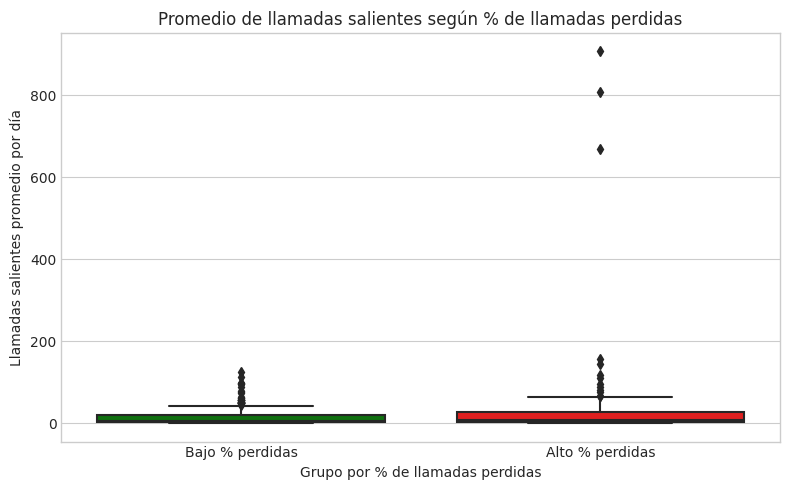

In [83]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged, x='is_high_missed_rate', y='avg_outgoing_calls_per_day',
            palette={True: 'red', False: 'green'})
plt.xticks([0, 1], ['Bajo % perdidas', 'Alto % perdidas'])
plt.title('Promedio de llamadas salientes según % de llamadas perdidas')
plt.xlabel('Grupo por % de llamadas perdidas')
plt.ylabel('Llamadas salientes promedio por día')
plt.tight_layout()
plt.show()

<h1 style="font-size:35px;">Observaciones</h1> 

Despues de aplicar una prueba a/b a las 3 hipotesis se puede obercar lo siguiente:


Hipotesis 1:


El Grupo B pierde en promedio más de la mitad de las llamadas. La diferencia con el Grupo A (que casi no pierde llamadas) es abismal.

El valor p < 0.01 indica que la diferencia es estadísticamente significativa.




Hipotesis 2:


Hay una diferencia crítica de más de 110 segundos entre los grupos.

Los operadores ineficaces hacen esperar a los clientes más de 2 minutos, lo cual compromete la calidad del servicio.

El valor p = 0.0000 refuerza que esta diferencia no es por azar, sino real y muy marcada y muy grande en el tiempo promedio de espera entre lo más eficaces y los que no.


Hipoetesis 3.-


El valor p prácticamente cero indica que esta diferencia es altamente significativa y robusta y confirma que los operadores eficaces estan muy por encima de los no eficaces en cuanto a las llamadas salientes realizadas.



<h1 style="font-size:35px;">Conclusiones finales</h1> 

Al haber realizado el análisis de las tres hipótesis y las pruebas A/B, se puede concluir que:

Existe una diferencia operativa significativa entre los grupos eficaces e ineficaces, principalmente en dos de los tres factores analizados: el tiempo de espera y el número de llamadas salientes.

En los tres aspectos evaluados, existen puntos muy altos y bajos. Sin embargo, se debe prestar mayor atención a aquellos operadores que se encuentran muy por debajo del promedio, ya que serían los principales a analizar y considerar como los menos eficaces.

Los principales operadores a considerar como ineficaces son aquellos con más de 13 llamadas perdidas por día, más de 50 segundos en espera y los que realizan menos de 13 llamadas salientes por día.

Las llamadas que no son atendidas por falta de un operador afectan significativamente el servicio que brinda la empresa y deben atenderse a la brevedad.

Como recomendaciones finales:

1. Incorporar los tres indicadores clave (llamadas perdidas, tiempo de espera, llamadas salientes) en dashboards diarios.

2. Generar alertas automáticas y ofrecer capacitación especial cuando un operador supere:
- 30% de llamadas perdidas.
- 50 segundos de espera promedio.
- Menos de 13 llamadas salientes por día.

3. Utilizar estos resultados para:
- Identificar operadores a capacitar.
- Optimizar turnos y asignaciones.
- Diseñar bonificaciones e incentivos basados en rendimiento real.

4. Seguimiento personalizado:
Dar seguimiento específico a los operadores clasificados como ineficaces.
Investigar posibles causas: carga excesiva, fallas técnicas, problemas de capacitación o motivación.

5. Automatización del monitoreo:
Desarrollar scripts o herramientas que realicen este tipo de análisis semanalmente o en tiempo real, para mantener una operación eficiente sin necesidad de intervenciones manuales constantes.
